# Lending Club Case Study

### Group Members
1. Ravi Sankar Dasari
2. Wasim Khan

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

![Loan Dataset](https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png)

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    * *Fully paid: Applicant has fully paid the loan (the principal and the interest rate)*

    * *Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.*

    * *Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan*


2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business objectives

* Company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 


* Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

* If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

* In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


* To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

### Exploratory Data Analysis

### Data Understanding


Two Datasets are provided for the analysis

* Loan Data Set (contains the complete loan data for all loans issued through the time period 2007 to 2011.)

* Data dictionary (describes the meaning of these variables)

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#### Reading and Analysisng Loan.csv file

In [3]:
loan = pd.read_csv(r'C:\Users\ravisand\Documents\PG\Lending Club Case Study\loan.csv')

In [4]:
loan.shape

(39717, 111)

loan.csv has 39717 records and 111 columns

In [5]:
#Exploring loan data
pd.set_option('display.max_columns', None)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


There are 74 float, 12 integer and 24 object type columns

## Data Cleaning

In [8]:
#Getting null columns more than 50 percentile
nullcolumns = round(loan.isnull().sum()/len(loan)*100,2)
nullcolumns=nullcolumns.loc[nullcolumns>0]

In [9]:
columns_with_more_than_fiftyperc = list(nullcolumns[nullcolumns >= 50].index)

len(columns_with_more_than_fiftyperc)

57

There are 57 columns which has null values more than 50 percentile of null values. Hence removing the columns

In [10]:
#Removing columns having more than 50 percentile of null values 

loan = loan.drop(columns_with_more_than_fiftyperc,axis=1)

In [11]:
loan.shape

(39717, 54)

54 columns remaining after removing 57 columns

In [12]:
#Analysing the remaining null values
nullcolumns = round(loan.isnull().sum()/len(loan)*100,2)
nullcolumns=nullcolumns.loc[nullcolumns!=0]
nullcolumns

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [13]:
#removing 'desc' columns as 32% of values are null and can be discarded
loan = loan.drop('desc', axis=1)
loan.shape

(39717, 53)

In [14]:
#removing 'member_id' column which is redundant to the column 'id'
loan = loan.drop('member_id', axis=1)
loan.shape

(39717, 52)

In [15]:
#emp_title null records
loan.emp_title.isnull().sum()


2459

In [16]:
#emp_length null records
loan.emp_length.isnull().sum()

1075

emp_title and emp_length has 6.19% and 2.71% of null values respectively.
As 'emp_title' is job title suppiled by the borrower and it is a free text, we can't impute these column values.
Also we can impute emp_length with the median emp_length. But imputing 1075 rows with a single value may make the analysis biased.
Hence we chose to discard the null records from these 2 columns.

In [17]:
#removing null values from emp_title and emp_length

loan = loan[~loan.emp_title.isnull()]
loan = loan[~loan.emp_length.isnull()]

Sanity Check

In [18]:
loan[loan.emp_title.isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [19]:
loan[loan.emp_length.isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [20]:
loan.shape

(37202, 52)

In [21]:
#Analysing the remaining null values
nullcolumns = round(loan.isnull().sum()/len(loan)*100,2)
nullcolumns=nullcolumns.loc[nullcolumns!=0]
nullcolumns

title                         0.02
revol_util                    0.12
last_pymnt_d                  0.17
collections_12_mths_ex_med    0.13
chargeoff_within_12_mths      0.13
pub_rec_bankruptcies          1.76
tax_liens                     0.09
dtype: float64

In [22]:
loan.pub_rec_bankruptcies.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36548.000000
mean         0.041480
std          0.200358
min          0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

As we can see 95th percentile of pub_rec_bankruptcies is also 0.00. Hence imputing the missing values of pub_rec_bankruptcies with it's median.

In [23]:
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].median())

In [24]:
#Analysing the remaining null values
nullcolumns = round(loan.isnull().sum()/len(loan)*100,2)
nullcolumns=nullcolumns.loc[nullcolumns!=0]
nullcolumns

title                         0.02
revol_util                    0.12
last_pymnt_d                  0.17
collections_12_mths_ex_med    0.13
chargeoff_within_12_mths      0.13
tax_liens                     0.09
dtype: float64

Since title is a free text column and last_pymnt_d is a date column, so we can't accurately impute these column values.
We can impute the revol_util with mean(if norally distributed) or median(if there are outliers in data) for the null values. 
Considering title, revol_util and last_pymnt_d to have small percentile of null values, we chose to remove the NULL rows.

In [25]:
#removing null values from title, revol_util, last_pymnt_d and pub_rec_bankruptcies

loan = loan[~loan.title.isnull()]
loan = loan[~loan.revol_util.isnull()]
loan = loan[~loan.last_pymnt_d.isnull()]
#loan = loan[~loan.pub_rec_bankruptcies.isnull()]

In [26]:
loan.shape

(37087, 52)

Sanity check

In [27]:
loan[loan.title.isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [28]:
loan[loan.revol_util.isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [29]:
loan[loan.last_pymnt_d.isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [30]:
loan[loan.pub_rec_bankruptcies.isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [31]:
#Analysing the remaining null values
nullcolumns = round(loan.isnull().sum()/len(loan)*100,2)
nullcolumns=nullcolumns.loc[nullcolumns!=0]
nullcolumns

collections_12_mths_ex_med    0.13
chargeoff_within_12_mths      0.13
tax_liens                     0.09
dtype: float64

In [32]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [33]:
loan.tax_liens.unique()

array([ 0., nan])

If we see **collections_12_mths_ex_med**, **chargeoff_within_12_mths** and **tax_liens** have a unique value so it makes sense to remove these columns

In [34]:
loan = loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'],axis=1)

In [35]:
loan.shape

(37087, 49)

In [36]:
#Analysing the remaining null values
nullcolumns = round(loan.isnull().sum()/len(loan)*100,2)
nullcolumns=nullcolumns.loc[nullcolumns!=0]
nullcolumns

Series([], dtype: float64)

So now we see there are no null values in any available columns

We go ahead and check for columns which only has unique values

In [37]:
#Analysing unique values in the datasets

loan.nunique().sort_values()

initial_list_status            1
pymnt_plan                     1
policy_code                    1
delinq_amnt                    1
acc_now_delinq                 1
application_type               1
term                           2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     80
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     368
earliest_cr_line             510
zip_code                     818
loan_amnt                    873
funded_amnt                 1030
out_prncp                   1064
out_prncp_

In [38]:
#Unique values in acc_now_delinq
loan.acc_now_delinq.value_counts()

0    37087
Name: acc_now_delinq, dtype: int64

In [39]:
#Unique values in application_type
loan.application_type.value_counts()

INDIVIDUAL    37087
Name: application_type, dtype: int64

In [40]:
#Unique values in policy_code
loan.policy_code.value_counts()

1    37087
Name: policy_code, dtype: int64

In [41]:
#Unique values in policy_code
loan.policy_code.value_counts()

1    37087
Name: policy_code, dtype: int64

In [42]:
#Unique values in delinq_amnt
loan.delinq_amnt.value_counts()

0    37087
Name: delinq_amnt, dtype: int64

In [43]:
#Unique values in pymnt_plan
loan.pymnt_plan.value_counts()

n    37087
Name: pymnt_plan, dtype: int64

We see some columns have only one value across all records in the data set. These columns wont help us in our analysis so these columns can be removed as they dont contriibute to anything

In [44]:
#Removing columns which has only one uniques records

loan = loan.drop(['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt','pymnt_plan'], axis=1)
loan.shape

(37087, 43)

In [45]:
loan.shape

(37087, 43)

In [46]:
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


<br>

There are some columns where we have months and years, but the values are not in datetime format the format. We can update the format of these columns

The date columns whose data types can be updated are **issue_d, earliest_cr_line, last_pymnt_d and last_credit_pull_d**

<mark>Manipulation of strings and dates is done</mark>

In [47]:
#Updating columns to datetime data type 

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

Sanity Check

In [48]:
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,1069639,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,2005-07-01,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


There are also some numeric columns which has more than 2 digit of decimals. So, we can round up these numeric values

In [49]:
loan.total_pymnt.value_counts().tail()

5648.168519     1
5049.640000     1
7940.183290     1
19740.215100    1
4608.000000     1
Name: total_pymnt, dtype: int64

In [50]:
loan.total_rec_late_fee.value_counts().tail()

44.840000    1
16.010000    1
29.914662    1
23.820000    1
29.750930    1
Name: total_rec_late_fee, dtype: int64

In [51]:
loan.collection_recovery_fee.value_counts().tail()

340.0000    1
3.2500      1
3.7500      1
154.8900    1
269.7156    1
Name: collection_recovery_fee, dtype: int64

In [52]:
#Rounding up values total_pymnt, total_rec_late_fee & collection_recovery_fee

loan.total_pymnt = round(loan.total_pymnt,2)
loan.total_rec_late_fee = round(loan.total_rec_late_fee,2)
loan.collection_recovery_fee = round(loan.collection_recovery_fee,2)

Sanity Check

In [53]:
loan.total_pymnt.value_counts().tail()

10669.49    1
4115.18     1
25927.00    1
26771.44    1
4608.00     1
Name: total_pymnt, dtype: int64

In [54]:
loan.total_rec_late_fee.value_counts().tail()

36.92    1
16.29    1
23.83    1
30.69    1
14.58    1
Name: total_rec_late_fee, dtype: int64

In [55]:
loan.collection_recovery_fee.value_counts().tail()

5.09      1
5.51      1
342.38    1
12.67     1
63.60     1
Name: collection_recovery_fee, dtype: int64

**int_rate & revol_util** are numeric columns denoting percentage. We can clean these columns and convert the dtype to float

In [56]:
loan[['int_rate','revol_util']]

,int_rate,revol_util
1,15.27%,9.40%
3,13.49%,21%
4,12.69%,53.90%
5,7.90%,28.30%
6,15.96%,85.60%
...,...,...
39710,7.43%,0.60%
39711,8.70%,23%
39712,8.07%,13.10%
39713,10.28%,26.90%


In [57]:
loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37087 entries, 1 to 39716
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   int_rate    37087 non-null  object
 1   revol_util  37087 non-null  object
dtypes: object(2)
memory usage: 869.2+ KB


In [58]:
loan.int_rate = loan.int_rate.apply(lambda x : x.replace('%','')).astype('float')
loan.revol_util = loan.revol_util.apply(lambda x : x.replace('%','')).astype('float')

Sanity Check

In [59]:
loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37087 entries, 1 to 39716
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    37087 non-null  float64
 1   revol_util  37087 non-null  float64
dtypes: float64(2)
memory usage: 869.2 KB


Let us now take a look at the emp_length column.

In [60]:
loan.emp_length.value_counts()

10+ years    8525
2 years      4262
< 1 year     4182
3 years      3971
4 years      3342
5 years      3162
1 year       3118
6 years      2153
7 years      1718
8 years      1430
9 years      1224
Name: emp_length, dtype: int64

In [61]:
loan.emp_length = loan.emp_length.replace(['10+ years','< 1 year'],['10 years','0 year'])

Sanity Check

In [62]:
loan.emp_length.value_counts()

10 years    8525
2 years     4262
0 year      4182
3 years     3971
4 years     3342
5 years     3162
1 year      3118
6 years     2153
7 years     1718
8 years     1430
9 years     1224
Name: emp_length, dtype: int64

In [63]:
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10 years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,1069639,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


**Check for the rows with missing values**

In [64]:
missing_rows = round(100*(loan.isnull().sum(axis=1)/len(loan.id)), 2)

In [65]:
missing_rows[missing_rows > 0]

Series([], dtype: float64)

Clearly there are no rows with any missing values.

In [66]:
loan.loan_status.value_counts()

Fully Paid     30966
Charged Off     5055
Current         1066
Name: loan_status, dtype: int64

**Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."**

In [67]:
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.shape

(36021, 43)

### Derived Columns

<br>
<mark>Type-driven and data-driven metrics can be created for the important variables like issue_d & earliest_cr_line and utilised for analysis
</mark><br>

- **issue_d:** The date which the loan was funded .Lets split the available date into month and year column.


- These metrics can be used to analyse about the loan details which were disbursed to applicants in specific Months and Years.

In [68]:
loan['issue_d_year'] = loan.issue_d.dt.year

loan['issue_d_month'] = loan.issue_d.dt.strftime('%b')

<br>

- **earliest_cr_line:** The date representing the Earliest CR line .Lets split the available date into month and year column.


- These metrics can be used to analyse about the Earliest CR line in specific Months and Years.

In [69]:
loan['earliest_cr_line_year'] = loan.earliest_cr_line.dt.year

loan['earliest_cr_line_month'] = loan.earliest_cr_line.dt.strftime('%b')


<br><mark>Business-driven and data-driven metrics can be created for the important variables like loan_amnt, annual_inc, dti & int_rate and utilised for analysis.
    While these are quantitaive variables, segregating them into bins will help us to draw some useful insights during bivariate analysis.
</mark><br>

In [70]:
loan.loan_amnt = loan.loan_amnt.astype('int')

loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

In [71]:
loan.annual_inc = loan.annual_inc.astype('float64')

loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [72]:
loan.dti = loan.dti.astype('float')

loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '25+'])

In [73]:
loan.int_rate = loan.int_rate.astype('float64')

loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 15, 20], labels=['0-10', '10-12.5', '12.5-15', '15+'])

In [74]:
loan.installment = loan.installment.astype('float64')

loan['installment_cats'] = pd.cut(loan['installment'], [0, 200, 400, 600, 800,1000,1200,1400], labels=['0-200', '200-400', '400-600', '600-800', '800-1000','1000-1200','1200+'])

In [75]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,loan_amnt_cats,annual_inc_cats,dti_cats,int_rate_cats,installment_cats
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,Dec,1999,Apr,0-7000,20000-40000,0-5,15+,0-200
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10 years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,Dec,1996,Feb,7000-14000,40000-60000,15-20,12.5-15,200-400
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,2011,Dec,2004,Nov,0-7000,20000-40000,10-15,0-10,0-200
6,1069639,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,2011,Dec,2005,Jul,0-7000,40000-60000,25+,15+,0-200
7,1072053,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,2011,Dec,2007,Jan,0-7000,40000-60000,5-10,15+,0-200


## Univariate Analysis

In [76]:
#Method to add to annotation to the bars
def showPlotValues(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

##### Loan Amount Analysis

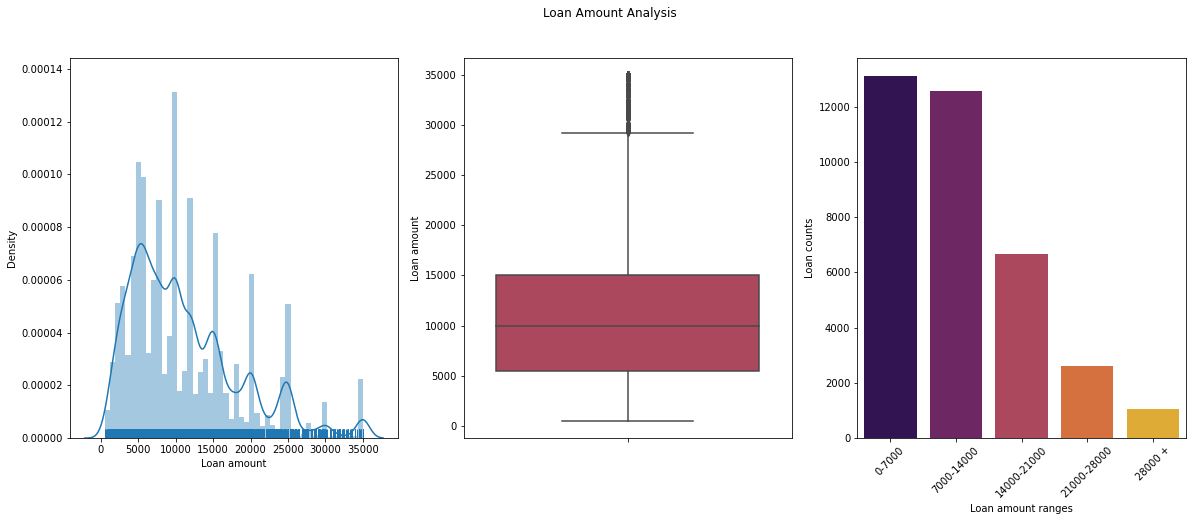

In [77]:
loan_amnt_cats_vc = loan.loan_amnt_cats.value_counts().reset_index()
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.distplot(a=loan.loan_amnt, rug=True,)
plt.xlabel('Loan amount')

plt.subplot(1,3,2)
sns.boxplot(y='loan_amnt', data=loan, palette = "inferno",)
plt.suptitle('Loan Amount Analysis')
plt.ylabel('Loan amount')

plt.subplot(1,3,3)
sns.barplot(x='index', y= 'loan_amnt_cats',data = loan_amnt_cats_vc,palette = "inferno",)
plt.xticks(rotation=45)
plt.xlabel('Loan amount ranges')
plt.ylabel('Loan counts')
plt.show()

In [78]:
loan.loan_amnt.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])

count    36021.000000
mean     11115.148802
std       7311.306957
min        500.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      21600.000000
95%      25000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

**Observations**:<br>
- Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)

- It is also observed there are many outliers above the loan amount range of 30000

- From the above plots, more number of people took loan amount of 10000, and also median of distribution is 10000. And very few people took more than 30000 loan amount.

- funded_amnt and funded_amnt_inv might not be releant here, as they are equal to loan_amnt most of the times.

##### Loan Status Analysis

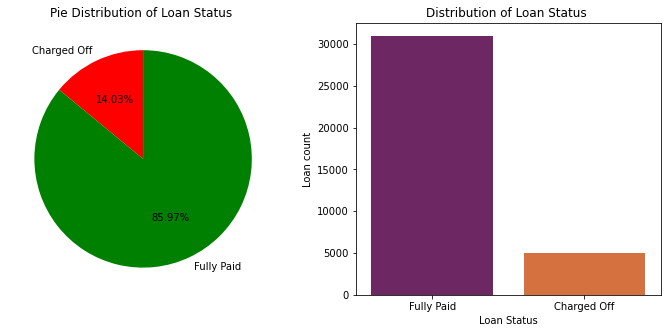

In [79]:
loan_status_grpby = loan.groupby('loan_status')
loan_status_vc = loan.loan_status.value_counts().reset_index()
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title('Pie Distribution of Loan Status ')
# Data to plot
labels = 'Charged Off','Fully Paid'
colors = ['red', 'green']
# Plot
plt.pie(loan_status_grpby['id'].count(), labels=labels, colors=colors,autopct='%1.2f%%', startangle=90)
plt.subplot(1,2,2)
sns.barplot(x='index', y= 'loan_status',data = loan_status_vc,palette = "inferno",)
plt.xlabel('Loan Status')
plt.ylabel('Loan count')
plt.title('Distribution of Loan Status ')
plt.show()

**Observations:**

- 85% of borrowers has paid the loan fully, where as 14% are defaulted the loan.

##### Purpose Analysis

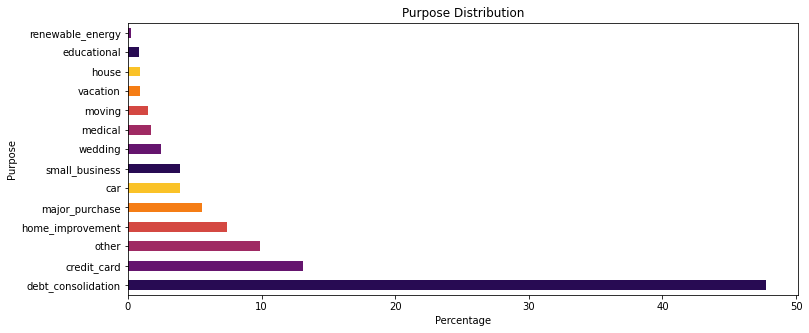

In [80]:
plt.figure(figsize=(12,5))
prob_df = loan['purpose'].value_counts(normalize=True)*100

prob_df.reset_index()
prob_df.plot.barh(color=sns.color_palette("inferno"))
#sns.barplot(x=prob_df.index, y=prob_df.purpose, data=prob_df,palette = "inferno",)
plt.xlabel('Percentage')
plt.ylabel('Purpose')
plt.title('Purpose Distribution')
plt.show()

**Observations**:<br>
- Large number of applicants took loan for _debt consolidation_ and a very few people took for _renewable energy_

##### Interest Rate Analysis

In [81]:
loan.int_rate.describe()

count    36021.000000
mean        11.960184
std          3.683246
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

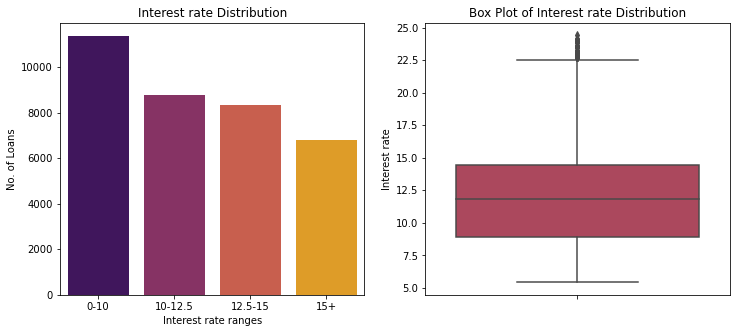

In [82]:
int_rate_cats_vc = loan.int_rate_cats.value_counts().reset_index()
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
#plt.suptitle('Distribution of Loan Status ')
sns.barplot(x='index', y= 'int_rate_cats',data = int_rate_cats_vc,palette = "inferno",)
plt.title('Interest rate Distribution')
plt.xlabel('Interest rate ranges')
plt.ylabel('No. of Loans')

plt.subplot(1,2,2)
sns.boxplot(y='int_rate', data=loan, palette = "inferno",)
plt.title('Box Plot of Interest rate Distribution')
plt.ylabel('Interest rate')
plt.show()

**Observations:**

- From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between 9% to 14.5%. Some Borrowers took loan at higher rates of interest i.e., 22.5%

- There are large number of loans sanctioned for lower interest rates.

- Mean interest rate comes out to be 11.98% and median at 11.83%

##### Annual Income Analysis

In [83]:
loan.annual_inc.describe()

count    3.602100e+04
mean     6.910309e+04
std      6.466444e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.232000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Text(0, 0.5, 'Annual income')

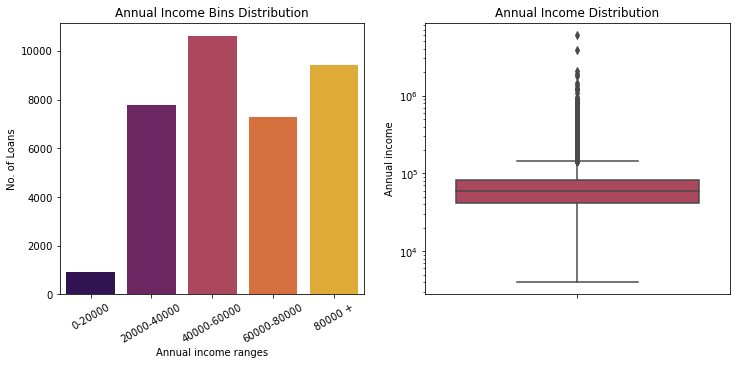

In [84]:
annual_inc_cats_vc = loan.annual_inc_cats.value_counts().reset_index()
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.barplot(x='index', y= 'annual_inc_cats',data = annual_inc_cats_vc,palette = "inferno",)
plt.title('Annual Income Bins Distribution')
plt.xticks(rotation=30)
plt.xlabel('Annual income ranges')
plt.ylabel('No. of Loans')

plt.subplot(1,2,2)
sns.boxplot(y='annual_inc', data=loan, palette = "inferno",)
plt.title('Annual Income Distribution')
plt.yscale('log')
plt.ylabel('Annual income')

**Observations**:<br>
- As seen, The annual income is mostly scewed towards the right which mean people with less annual income tend to take more loans.

- Around 361 people are having more the 235000 annual income. and 99% of people are having incomes below 235000.

- As there are many outliers in annual income, median is the right metric to choose and the median annual income is 60000.

##### DTI (Depth-to-Income) Analysis

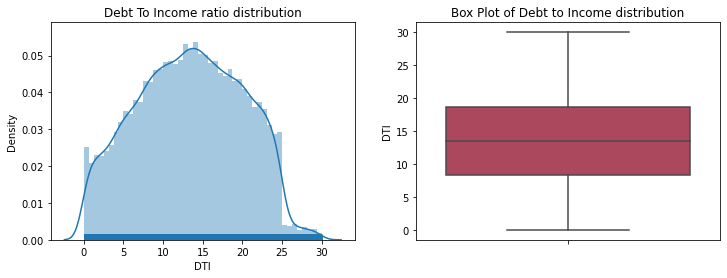

In [85]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.dti, rug=True)
plt.title('Debt To Income ratio distribution')
plt.xlabel('DTI')
plt.ylabel('Density')
plt.subplot(1,2,2)
sns.boxplot(y= 'dti', data=loan, palette = "inferno",)
plt.title('Box Plot of Debt to Income distribution')
plt.ylabel('DTI')
plt.show()

**Observations**:<br>

- Looks like there are no outliers and the distribution is very much similar to normal distribution.
- This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

##### Loan Issue Date Analysis

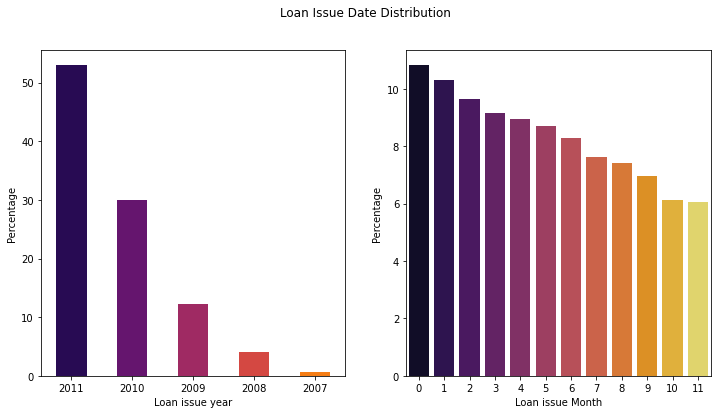

In [86]:
prob_year = loan['issue_d_year'].value_counts(normalize=True)*100
prob_year.reset_index()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
prob_year.plot.bar(x='index', y='issue_d_year', color=sns.color_palette("inferno"))
#sns.barplot(x='index', y='issue_d_year', data=prob_year, palette = "inferno",)
plt.xlabel('Loan issue year')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.suptitle('Loan Issue Date Distribution')


prob_month = loan['issue_d_month'].value_counts(normalize=True)*100
prob_month=prob_month.reset_index()

plt.subplot(1,2,2)
#prob_month.plot.bar(x='index', y='issue_d_month', color=sns.color_palette("inferno"))
sns.barplot(x=prob_month.index, y=prob_month.issue_d_month, data=prob_month, palette = "inferno")
#sns.barplot(x='index', y='issue_d_month', data=prob_month, palette = "inferno",)
plt.xlabel('Loan issue Month')
plt.ylabel('Percentage')
#plt.title('issue_d_month Distribution')

plt.show()


**Observations:**
- The lending club(LC) has doubling loan issues every year.

- There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec.

- Within a year, the number of loan issued rises over the month from Jan to Dec, Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year?

##### Term Analysis

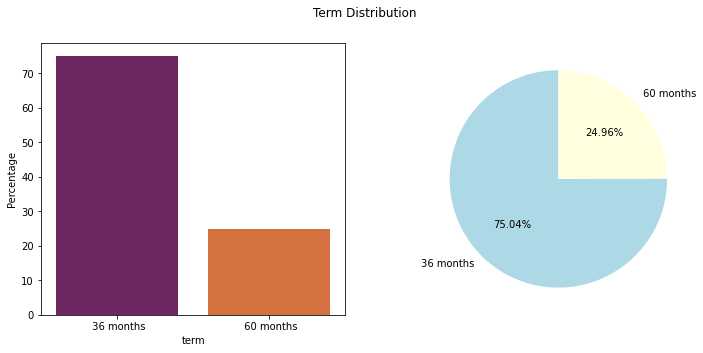

In [87]:
#Percentage of each values
plt.figure(figsize=(12,5))

prob_term = round(loan['term'].value_counts(normalize=True)*100,2)
prob_term=prob_term.reset_index()

plt.subplot(1,2,1)
sns.barplot(x='index', y='term', data=prob_term, palette = "inferno",)
plt.xlabel('term')
plt.ylabel('Percentage')
plt.suptitle('Term Distribution')

plt.subplot(1,2,2)
# Data to plot
labels = '36 months','60 months'
colors = ['lightblue', 'lightyellow']
# Plot
plt.pie(prob_term.term, labels=labels, colors=colors,autopct='%1.2f%%', startangle=90)
plt.show()

**Observations**:<br>
- Borrowers tend to take 36 months tenure more than 60 months.

- Approximately, 75% of loans were of 3 years and 25% of loans were of 5 years

##### Grade Analysis

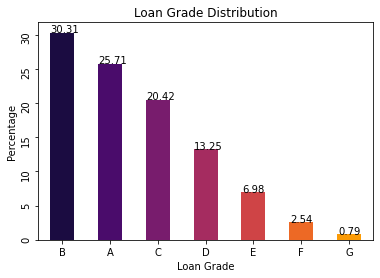

In [88]:
#Percentage of each values
prob_df = round(loan['grade'].value_counts(normalize=True)*100,2)
prob_df.reset_index()
ax=prob_df.plot.bar(color=sns.color_palette("inferno", 8))
plt.xlabel('Loan Grade')
plt.ylabel('Percentage')
plt.title('Loan Grade Distribution')

plt.xticks(rotation=0)
plt.yticks(rotation=90)
showPlotValues(ax)
plt.show()

**Observations**: <br>
Most borrowers fall under A and B grades than other grades

##### Subgrade Analysis

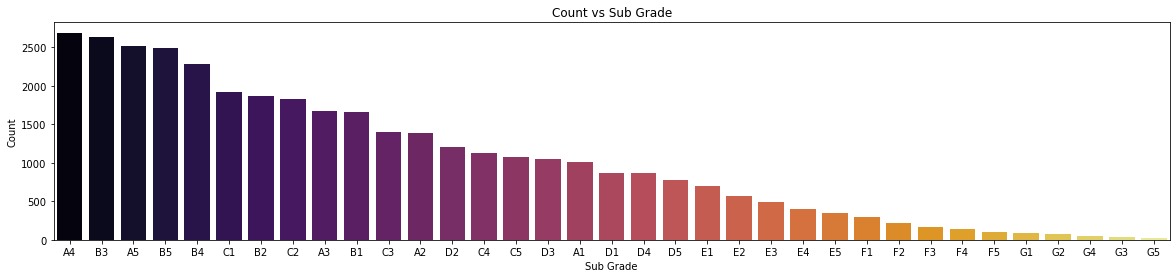

In [89]:
plt.figure(figsize=(20,4))
sns.countplot(loan.sub_grade, order=loan.sub_grade.value_counts().index, palette = "inferno")
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

**Observations**: <br>
Most borrowers fall under subgrades of A and B grades as compared to other grades

##### Employment Length Analysis

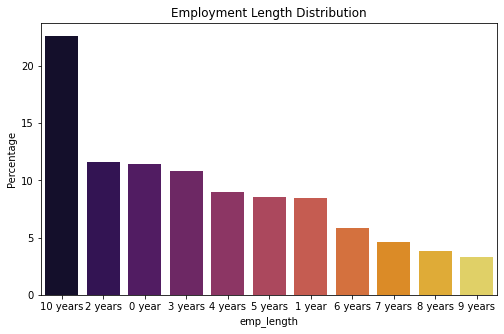

In [90]:
plt.figure(figsize=(18,5))
prob_emp_len = loan['emp_length'].value_counts(normalize=True)*100
prob_emp_len=prob_emp_len.reset_index()
prob_emp_len
plt.subplot(1,2,1)
sns.barplot(x='index', y='emp_length', data=prob_emp_len, palette = "inferno",)
plt.xlabel('emp_length')
plt.ylabel('Percentage')
plt.title('Employment Length Distribution')

plt.show()

**Observations**:<br>
Large number of applicants
who took loan are with employment length 10+ years.

##### Home Ownership Analysis

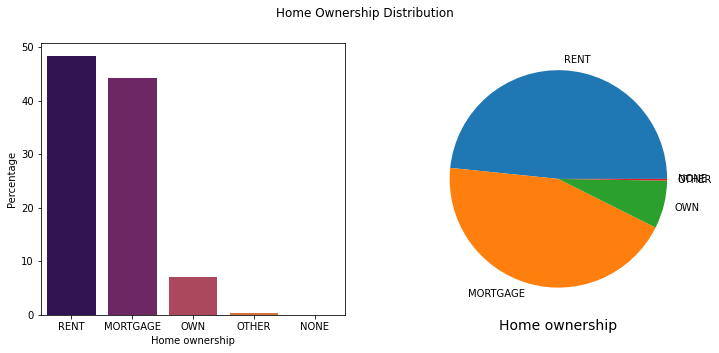

In [91]:
plt.figure(figsize=(12,5))
prob_home_ownership = loan['home_ownership'].value_counts(normalize=True)*100
prob_home_ownership = prob_home_ownership.reset_index()
plt.subplot(1,2,1)
sns.barplot(x='index', y='home_ownership', data=prob_home_ownership, palette = "inferno")
plt.xlabel('Home ownership')
plt.ylabel('Percentage')
plt.suptitle('Home Ownership Distribution')


plt.subplot(1,2,2)
loan['home_ownership'].value_counts().plot.pie()
plt.ylabel('')
plt.xlabel('Home ownership',fontsize=14)
plt.show()


**Observations:**
- The loan borrowers are mostly having rented and mortgage houses.

##### Address state Analysis

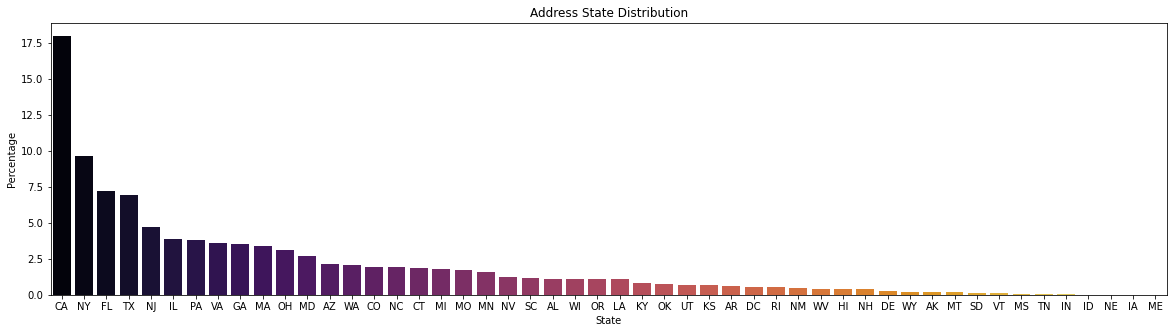

In [92]:
prob_addr_state = loan['addr_state'].value_counts(normalize=True)*100
prob_addr_state = prob_addr_state.reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x='index', y='addr_state', data=prob_addr_state, palette = "inferno",)
plt.xlabel('State')
plt.ylabel('Percentage')
plt.title('Address State Distribution')
plt.show()

**Observations:**
- Most of the borrowers are from CA, NY and FL

### Segmented Univariate Analysis : Categorical Variables

Here the data is divided into 2 segments based on the loan status i.e., Charged Off and Fully Paid. The below analysis gives insights on these 2 segments against different Categorical variables.
1. Purpose
2. Term
3. Home Ownership
4. Grade
5. Address State
6. Sub Grade
7. Employee Length
8. Issued Year

<mark>These analysis gives us insight of the Defaulters with different Parameters</mark>

In [93]:
loan_grpby_status = loan.groupby(by = 'loan_status')

In [94]:
def seg_cat_plot(variable,xlabel) :
    plt.figure(figsize=(15,5))
    sns.countplot(x=variable, hue="loan_status", data=loan,palette = "inferno",)
    plt.xlabel(xlabel.title(),fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('Count',fontsize=14)
    plt.title(xlabel.title() + ' Distribution for different loan status',fontsize=14)
    plt.show()

##### 1. Purpose

In [95]:
loan_grpby_status.purpose.value_counts()

loan_status  purpose           
Charged Off  debt_consolidation     2558
             other                   560
             credit_card             487
             small_business          371
             home_improvement        305
             major_purchase          194
             car                     151
             medical                  96
             wedding                  86
             moving                   82
             house                    53
             vacation                 49
             educational              48
             renewable_energy         15
Fully Paid   debt_consolidation    14632
             credit_card            4230
             other                  2996
             home_improvement       2355
             major_purchase         1798
             car                    1260
             small_business         1027
             wedding                 797
             medical                 535
             moving      

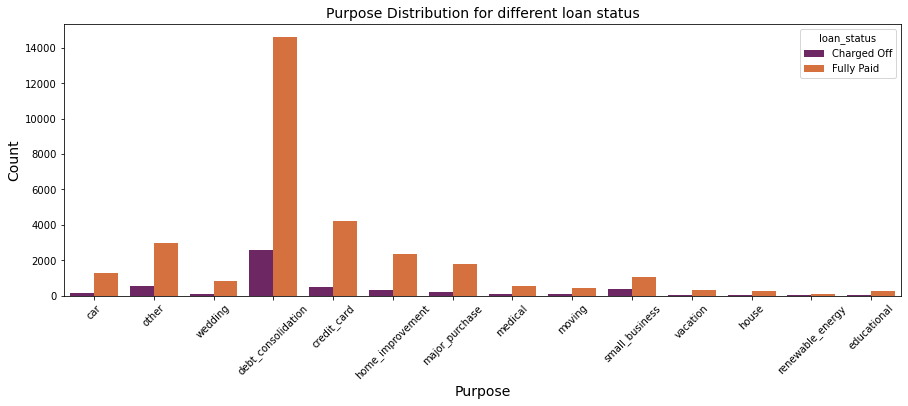

In [96]:
seg_cat_plot('purpose','Purpose')

**Inference:**

- Majority of loan has been given for the debt consolidation purpose and has been fully paid.

- Charged Off loans are higher for debt consolidation, credit card and other.

##### 2. Term

In [97]:
loan_grpby_status.term.value_counts()

loan_status  term      
Charged Off   36 months     2842
              60 months     2213
Fully Paid    36 months    24189
              60 months     6777
Name: term, dtype: int64

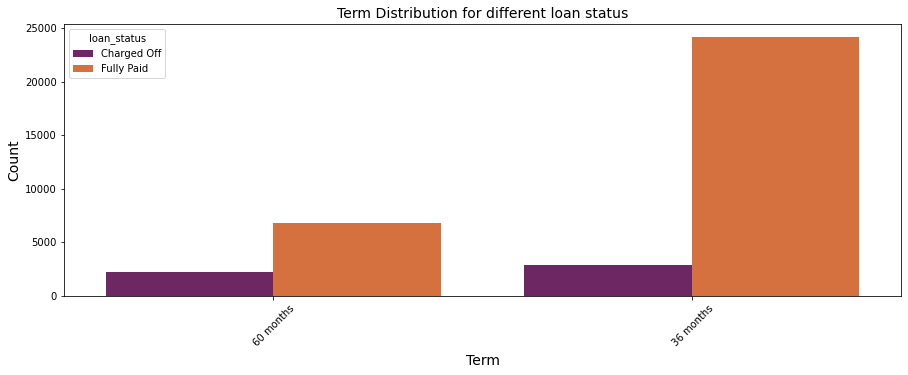

In [98]:
seg_cat_plot('term','Term')


**Inference:**
- Initial Univariate Analysis says, most of the Charged off applicants apply for 36 months Loan Term.

##### 3. Home Ownership

In [99]:
loan_grpby_status.home_ownership.value_counts()

loan_status  home_ownership
Charged Off  RENT               2575
             MORTGAGE           2103
             OWN                 359
             OTHER                18
Fully Paid   RENT              14853
             MORTGAGE          13832
             OWN                2204
             OTHER                76
             NONE                  1
Name: home_ownership, dtype: int64

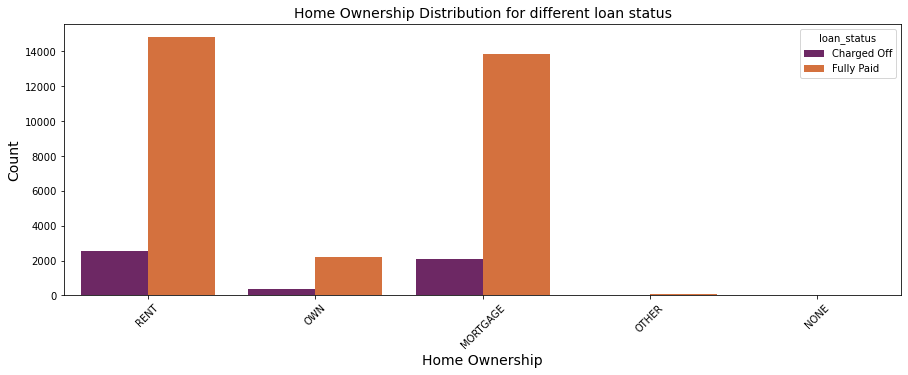

In [100]:
seg_cat_plot('home_ownership','Home Ownership')


**Inference:**
- Initial Univariate Analysis shows, frequency of RENT and MORTGAGE home ownership is high for Charged Off.

##### 4. Grade

In [101]:
loan_grpby_status.grade.value_counts()

loan_status  grade
Charged Off  B        1281
             C        1203
             D        1011
             E         658
             A         518
             F         291
             G          93
Fully Paid   B        9636
             A        8744
             C        6154
             D        3760
             E        1856
             F         625
             G         191
Name: grade, dtype: int64

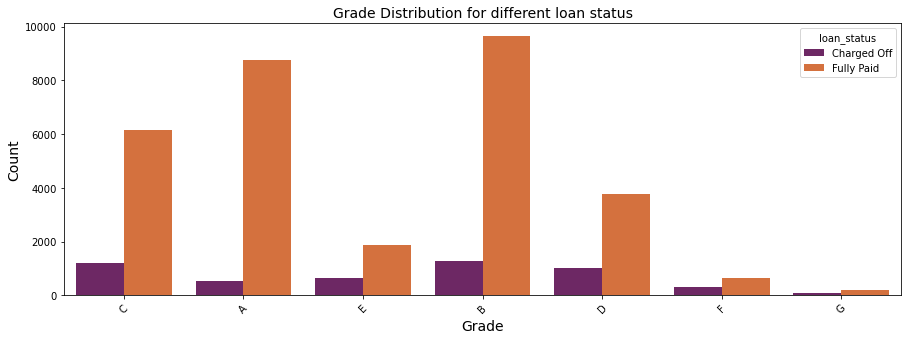

In [102]:
seg_cat_plot('grade','Grade')


**Inference:**
- Initial Univariate Analysis says, most of the Charged off applicants belong to Grade B, C and D.

##### 5. Address State

In [103]:
loan_grpby_status.addr_state.value_counts()

loan_status  addr_state
Charged Off  CA            999
             FL            454
             NY            452
             TX            277
             NJ            263
                          ... 
Fully Paid   IN              9
             IA              5
             ID              4
             ME              3
             NE              2
Name: addr_state, Length: 97, dtype: int64

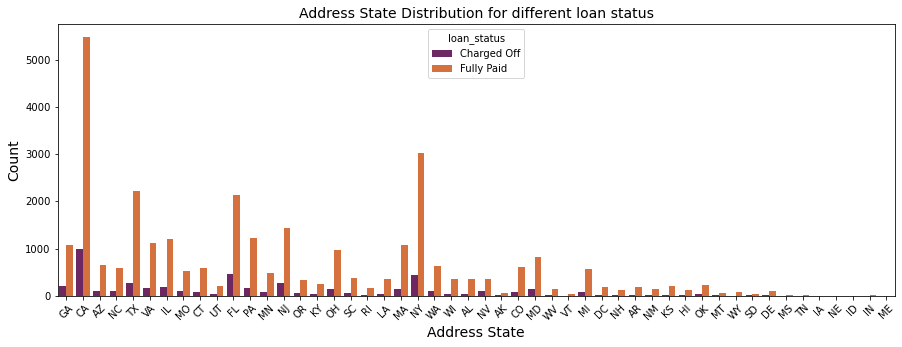

In [104]:
seg_cat_plot('addr_state','Address State')


**Inference:**
- Initial Univariate Analysis says, the top 3 Address States of Charged off are: CA, NY andFL

##### 6. Sub Grade

In [105]:
loan_grpby_status.sub_grade.value_counts()

loan_status  sub_grade
Charged Off  B5           338
             B3           310
             C1           299
             B4           288
             C2           288
                         ... 
Fully Paid   F5            53
             G2            47
             G4            41
             G3            23
             G5            17
Name: sub_grade, Length: 70, dtype: int64

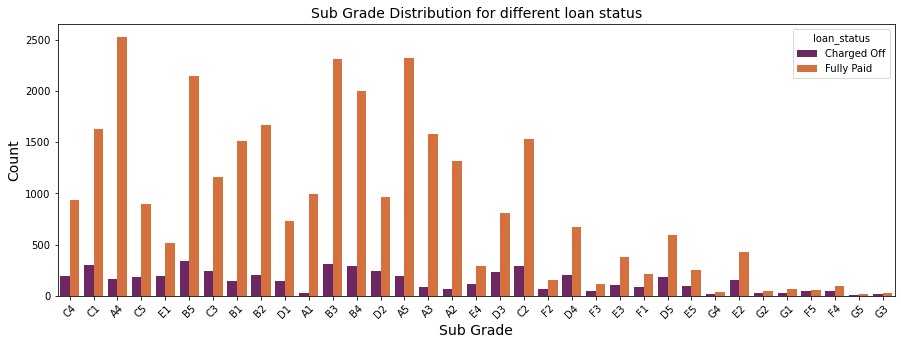

In [106]:
seg_cat_plot('sub_grade','Sub Grade')


**Inference:**
- Initial Univariate Analysis says, of the Grade B, C and D, most of the Charged off applicants belong to Sub Grades:

    1. Grade B => B3, B5, B4
    2. Grade C => C1, C2, C3
    3. Grade D => D2, D3, D4

##### 7. Employee length

In [107]:
loan_grpby_status.emp_length.value_counts()

loan_status  emp_length
Charged Off  10 years      1261
             0 year         551
             2 years        540
             3 years        527
             4 years        439
             5 years        426
             1 year         422
             6 years        293
             7 years        253
             8 years        194
             9 years        149
Fully Paid   10 years      6885
             2 years       3627
             0 year        3557
             3 years       3363
             4 years       2812
             5 years       2650
             1 year        2629
             6 years       1801
             7 years       1406
             8 years       1192
             9 years       1044
Name: emp_length, dtype: int64

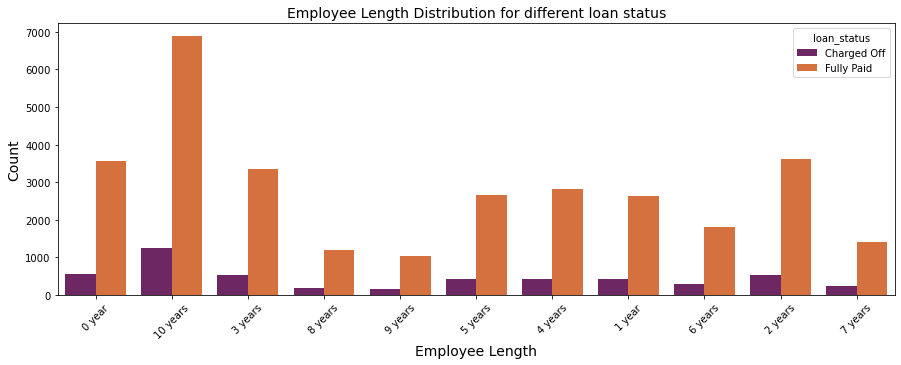

In [108]:
seg_cat_plot('emp_length','Employee Length')


**Inference:**
- Initial Univariate Analysis says, most of the Charged Off borrowers has employment length:10+ years and < 1 year

##### 8. Issued Year

In [109]:
loan_grpby_status.issue_d_year.value_counts()

loan_status  issue_d_year
Charged Off  2011             2931
             2010             1309
             2009              542
             2008              231
             2007               42
Fully Paid   2011            16159
             2010             9486
             2009             3882
             2008             1254
             2007              185
Name: issue_d_year, dtype: int64

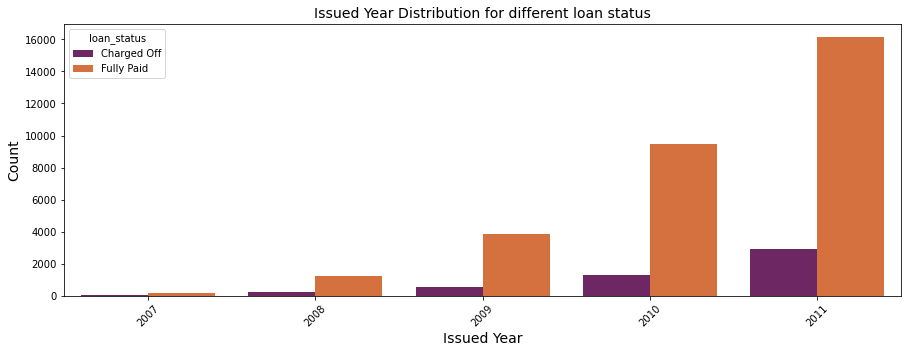

In [110]:
seg_cat_plot('issue_d_year','Issued year')


**Inference:**
- Initial Univariate Analysis says, Charged Off Applicants are more in the Loan issued year 2011 and this it is in an increasing trend.

### Segmented Univariate Analysis : Quantitative Variables

Here the data is divided into 2 segments based on the loan status i.e., Charged Off and Fully Paid. The below analysis gives insights on these 2 segments against different **Quantitative** variables.
1. Loan Amount
2. Interest Rate
3. Annual Income
4. DTI
5. Installment Amount

<mark>These analysis gives us insight of the Defaulters with different Parameters</mark>

In [111]:
def seg_quant_plot(variable,ylabel) :
    plt.figure(figsize=(7,5))
    sns.boxplot(y=variable, x="loan_status", data=loan,palette = "inferno",)
    plt.xticks(rotation=0)
    plt.xlabel('Loan Status',fontsize=14)
    plt.ylabel(ylabel.title(),fontsize=14)
    plt.title(ylabel.title() + ' Distribution for different loan status',fontsize=14)
    plt.show()

##### 1. Loan Amount

In [112]:
loan_grpby_status.loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5055.0,12296.874382,8047.803213,900.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30966.0,10922.239715,7165.574233,500.0,5500.0,9600.0,15000.0,35000.0


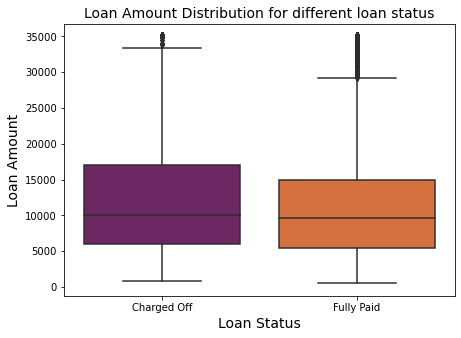

In [113]:
seg_quant_plot('loan_amnt','Loan Amount')

**Observations:**
    
- Initial Univariate Analysis says, Charged Off Applicants has median of Loan Amount as 10,000 with minimum 25th percentile value as 6000 and maximum 75th percentile value as 17000.


- Also from the description of loan_amnt above we see the mean (11133.07) > median (10000). This shows the data is positively skewed and this is due to outliers. Hence, Median would be the right choice for this distribution, as median is not affected by outliers.

##### 2. Interest Rate

In [114]:
loan_grpby_status.int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5055.0,13.87894,3.633783,5.42,11.41,13.61,16.45,24.40
Fully Paid,30966.0,11.64696,3.595368,5.42,8.59,11.49,13.99,24.11


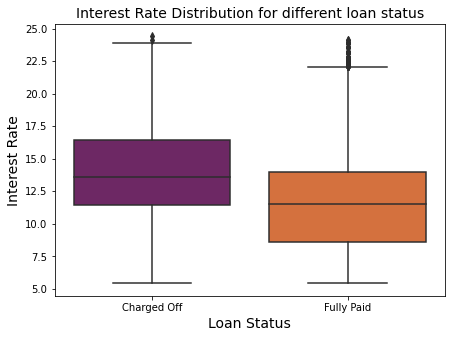

In [115]:
seg_quant_plot('int_rate','Interest Rate')

**Observation:**

- Initial Univariate Analysis says, Charged Off Applicants has a Median Interest Rate as 13.79% with minimum 25th percentile value as 11.49% and maximum 75th percentile value as 16.45%. Also, the interest rates of Charged Off applicants is higher than the fully paid applicants.


- Also from the description of int_rate above we see the mean  > median . This shows the data is positively skewed and this is due to outliers. Hence, Median would be the right choice for this distribution, as median is not affected by outliers.

##### 3. Annual Income

In [116]:
loan_grpby_status.annual_inc.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5055.0,63186.564726,47883.416926,4080.0,38400.0,54000.0,75000.0,1250000.0
Fully Paid,30966.0,70068.926908,66956.992789,4000.0,42000.0,60000.0,84000.0,6000000.0


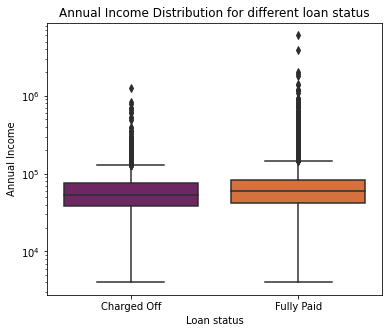

In [117]:
plt.figure(figsize=(6,5))
sns.boxplot(y='annual_inc', x="loan_status", data=loan,palette = "inferno",)
plt.xticks(rotation=0)
plt.yscale('log')

plt.xlabel('Loan status')
plt.ylabel('Annual Income')
plt.title('Annual Income Distribution for different loan status')
plt.show()

**Observation:**
- Charged Off Applicants has a Median of Annual Income as 54,000 with minimum 25th percentile
value as 38,400 and maximum 75th percentile value as 75,000.
Clearly, annual income of Charged Off Applicants are lower than the annual income of fully paid applicants.


- Also from the description of annual_inc above we see the mean  > median . 
This shows the data is positively skewed and this is due to outliers. 
Hence, Median would be the right choice for this distribution, as median is not affected by outliers.

##### 4. DTI

In [118]:
loan_grpby_status.dti.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5055.0,14.116081,6.535725,0.0,9.275,14.4,19.315,29.85
Fully Paid,30966.0,13.236912,6.654275,0.0,8.110,13.3,18.480,29.99


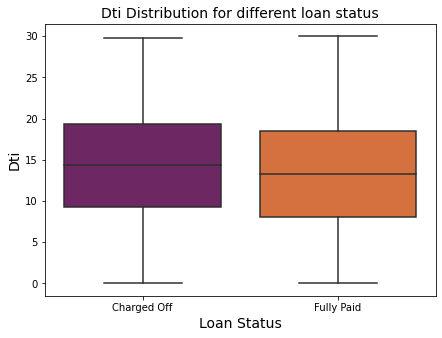

In [119]:
seg_quant_plot('dti','DTI')

**Observation: **

- Charged Off Applicants has a Median dti as 14.4 with minimum 25th percentile value as 9.355 and maximum 75th percentile value as 19.34. Also, mean dti of charged off applicants is higher.


- Clearly, dti of Charged Off Applicants are higher than the annual income of fully paid applicants.


##### 5. Installment Amount

In [120]:
loan_grpby_status.installment.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5055.0,340.566615,215.600265,22.79,172.715,301.04,462.405,1305.19
Fully Paid,30966.0,321.440068,205.692059,16.08,167.080,278.23,421.875,1295.21


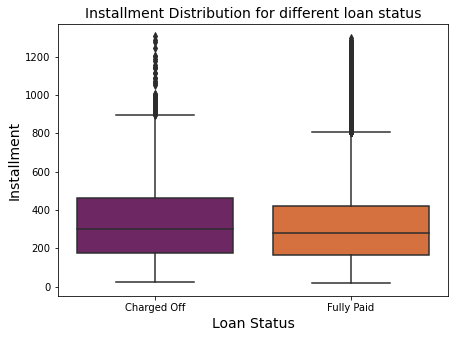

In [121]:
seg_quant_plot('installment','Installment')

**Observation:**

- Initial Univariate Analysis says, Charged Off Applicants has a Median Installment Amount as 298.33 with minimum 25th percentile
value as 172.43 and maximum 75th percentile value as 458.31 .
Also, the Installment Amount of Charged Off applicants is higher than the fully paid applicants.


- Also from the description of int_rate above we see the mean  > median . This shows the data is positively skewed and this is due to outliers. Hence, Median would be the right choice for this distribution, as median is not affected by outliers.

### Segmented Univariate Analysis : Some important Variables


##### Variable: Loan amount

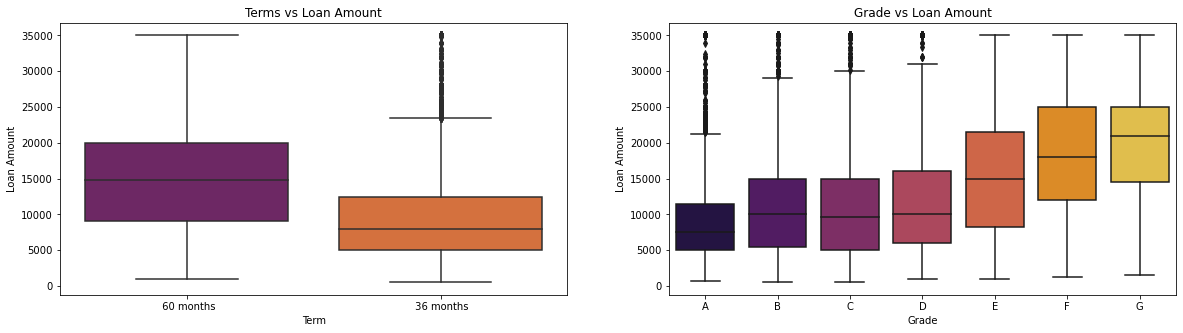

In [122]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.loan_amnt, data=loan,palette = "inferno")
plt.title('Terms vs Loan Amount')
plt.xlabel('Term')
plt.ylabel('Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.loan_amnt, order = grade_ord, data=loan, palette = "inferno")
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()

**Observations**:<br>
- Higher amount loans have high tenure i.e, 60 months.  


- Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

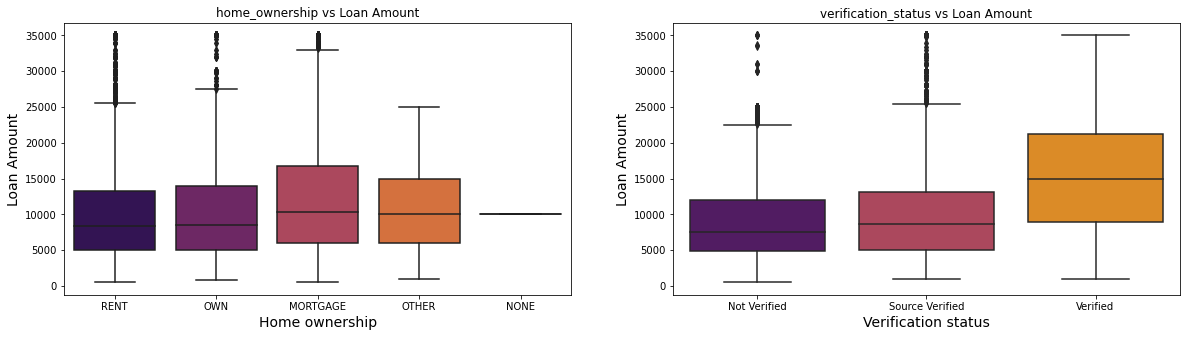

In [123]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.loan_amnt, data=loan, palette = "inferno")
plt.title('home_ownership vs Loan Amount')
plt.xlabel('Home ownership',fontsize=14)
plt.ylabel('Loan Amount',fontsize=14)
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.loan_amnt, order = verification_status_ord, data=loan, palette = "inferno")
plt.xlabel('Verification status',fontsize=14)
plt.ylabel('Loan Amount',fontsize=14)
plt.show()

**Observations**:<br>
- Significant number of borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers. 


- Mostly, borrowers are verified. Also, some amount of borrowers are not verified which can be concerning

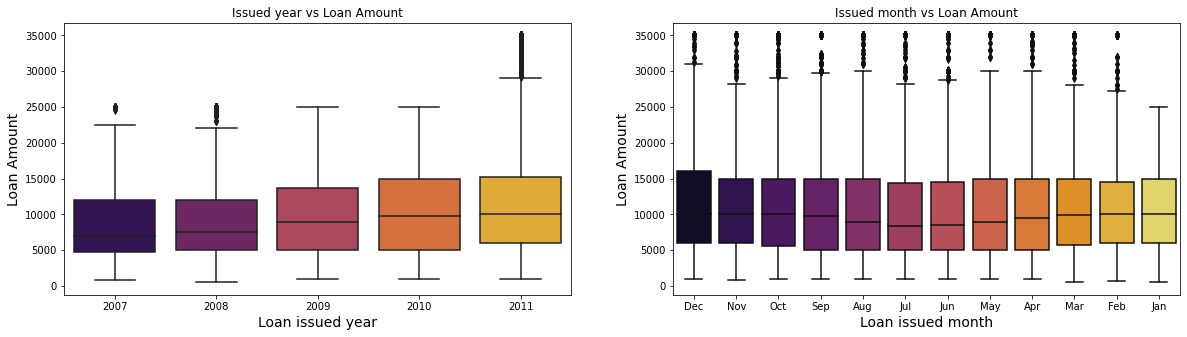

In [124]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan.issue_d_year, y=loan.loan_amnt, data=loan, palette = "inferno")
plt.xlabel('Loan issued year',fontsize=14)
plt.ylabel('Loan Amount',fontsize=14)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=loan.issue_d_month, y=loan.loan_amnt, data=loan, palette = "inferno")
plt.xlabel('Loan issued month',fontsize=14)
plt.ylabel('Loan Amount',fontsize=14)
plt.title('Issued month vs Loan Amount')
plt.show()

**Observations**:<br>
* The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.  
* Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.<br>
* Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.

##### Variable: Interest rate

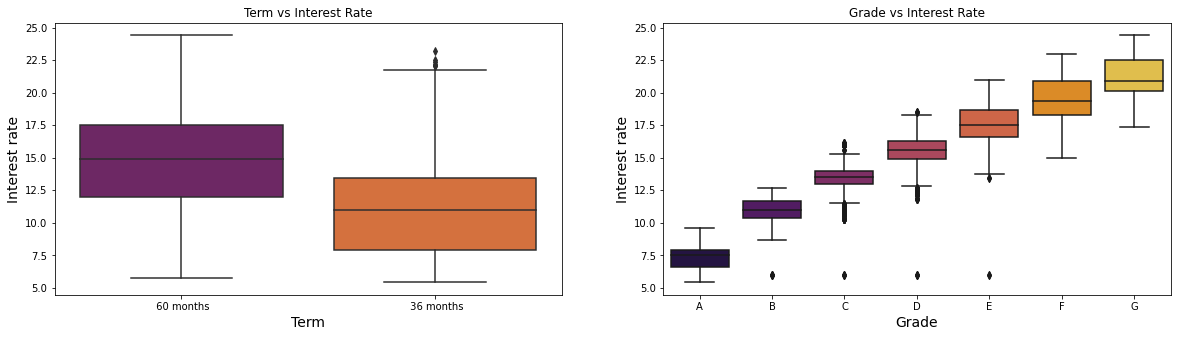

In [125]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.int_rate, data=loan, palette = "inferno")
plt.title('Term vs Interest Rate')
plt.xlabel('Term',fontsize=14)
plt.ylabel('Interest rate',fontsize=14)
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.int_rate, order = grade_ord, data=loan, palette = "inferno")
plt.xlabel('Grade',fontsize=14)
plt.ylabel('Interest rate',fontsize=14)
plt.show()

**Observation**:  

- The interest rates are higher for Higher tenure loans.  


- And Also Interest Rates are Higher as Grades are Lowering (A to G).

##### Variable: Annual income

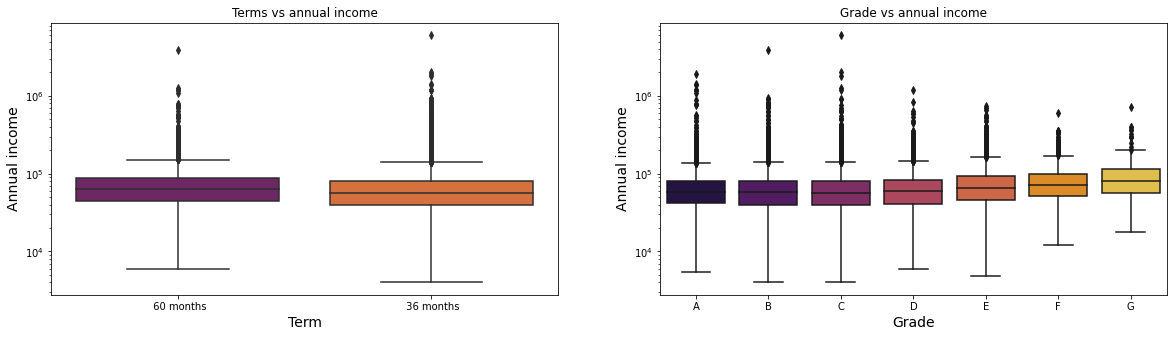

In [126]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.annual_inc, data=loan, palette = "inferno")
plt.xlabel('Term',fontsize=14)
plt.ylabel('Annual income',fontsize=14)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.annual_inc, order = grade_ord, data=loan, palette = "inferno")
plt.xlabel('Grade',fontsize=14)
plt.ylabel('Annual income',fontsize=14)
plt.yscale('log')

**Observations:**  
- Comparatively Annual income is higher for lower grades.

##### Variable: DTI (Debt to Income Ratio)

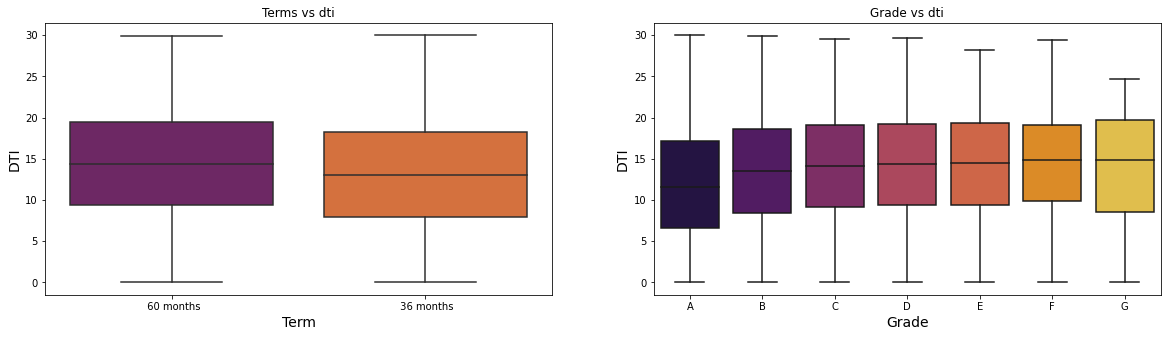

In [127]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.dti, data=loan, palette = "inferno")
plt.xlabel('Term',fontsize=14)
plt.ylabel('DTI',fontsize=14)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.dti, order = grade_ord, data=loan, palette = "inferno")
plt.xlabel('Grade',fontsize=14)
plt.ylabel('DTI',fontsize=14)
plt.show()

**Observation**:   

- DTI is bit high for people who got more tenure i.e., 60 months.  


- A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

## Bivariate Analysis: Categorical Variables

Below Bivariate Analysis gives us insights on how the Charged Off Rates are affected for different **Categorical Variables**.

Also, we will try to infer how the **loan amount, interest rate and DTI values** are distributed for each of these categories for 'Charged Off' and 'Fully Paid' loan statuses. 

1. House Ownership
2. Purpose
3. Interest Rate Bins
4. Term
5. Loan Amount Bins
6. Annual Income Bins
7. Installments Bins
8. DTI Bins
9. Employment Length
10. Grade
11. Sub Grade
12. Issue Year
13. Address State

In [128]:
def plot_bivariate(variable, pivoted_variable, plot_variable):
    x=pivoted_variable
    #print(x)
    plt.figure(figsize=(20,25))
    plt.subplot(221)
    sns.lineplot(data = x[:-1]['Charged Off Rate'], color = 'green')
    sns.barplot(x = x[:-1].index, y = x[:-1]['Charged Off Rate'], palette = 'inferno')
    plt.xlabel(variable.title(),fontsize=14)
    plt.ylabel('Charged Off Rate',fontsize=14)
    plt.xticks(rotation=45)
    plt.title('Charged Off Rates(%) for '+ variable.title(),fontsize=14)
    plt.subplot(222)
    sns.barplot(x=plot_variable, y='loan_amnt', hue='loan_status', data=loan, estimator=np.median, palette = 'inferno')
    plt.title(variable.title() + ' Vs Loan Amount Vs Loan Status',fontsize=14)
    plt.xlabel(variable.title(),fontsize=14)
    plt.ylabel('Loan Amount',fontsize=14)
    plt.xticks(rotation=45)
    plt.subplot(223)
    sns.boxplot(x=plot_variable, y='int_rate', hue='loan_status', data=loan, palette = 'inferno')
    plt.title(variable.title() + ' Vs Interest Rate Vs Loan Status',fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel(variable.title(),fontsize=14)
    plt.ylabel('Interest Rate',fontsize=14)
    plt.subplot(224)
    sns.barplot(x=plot_variable, y='dti', hue='loan_status', data=loan, estimator=np.mean, palette = 'inferno')
    plt.title(variable.title() + ' Vs DTI Vs Loan Status',fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel(variable.title(),fontsize=14)
    plt.ylabel('DTI',fontsize=14)
    plt.show()

##### 1. House Ownership

In [129]:
pivot_house_ownership = loan.pivot_table(values = 'id',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_house_ownership['Charged Off Rate'] = 100*(round((pivot_house_ownership['Charged Off']/pivot_house_ownership['Total']), 2))

pivot_house_ownership[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
home_ownership,,,,
OTHER,18,76,94,19.0
RENT,2575,14853,17428,15.0
OWN,359,2204,2563,14.0
MORTGAGE,2103,13832,15935,13.0
NONE,0,1,1,0.0


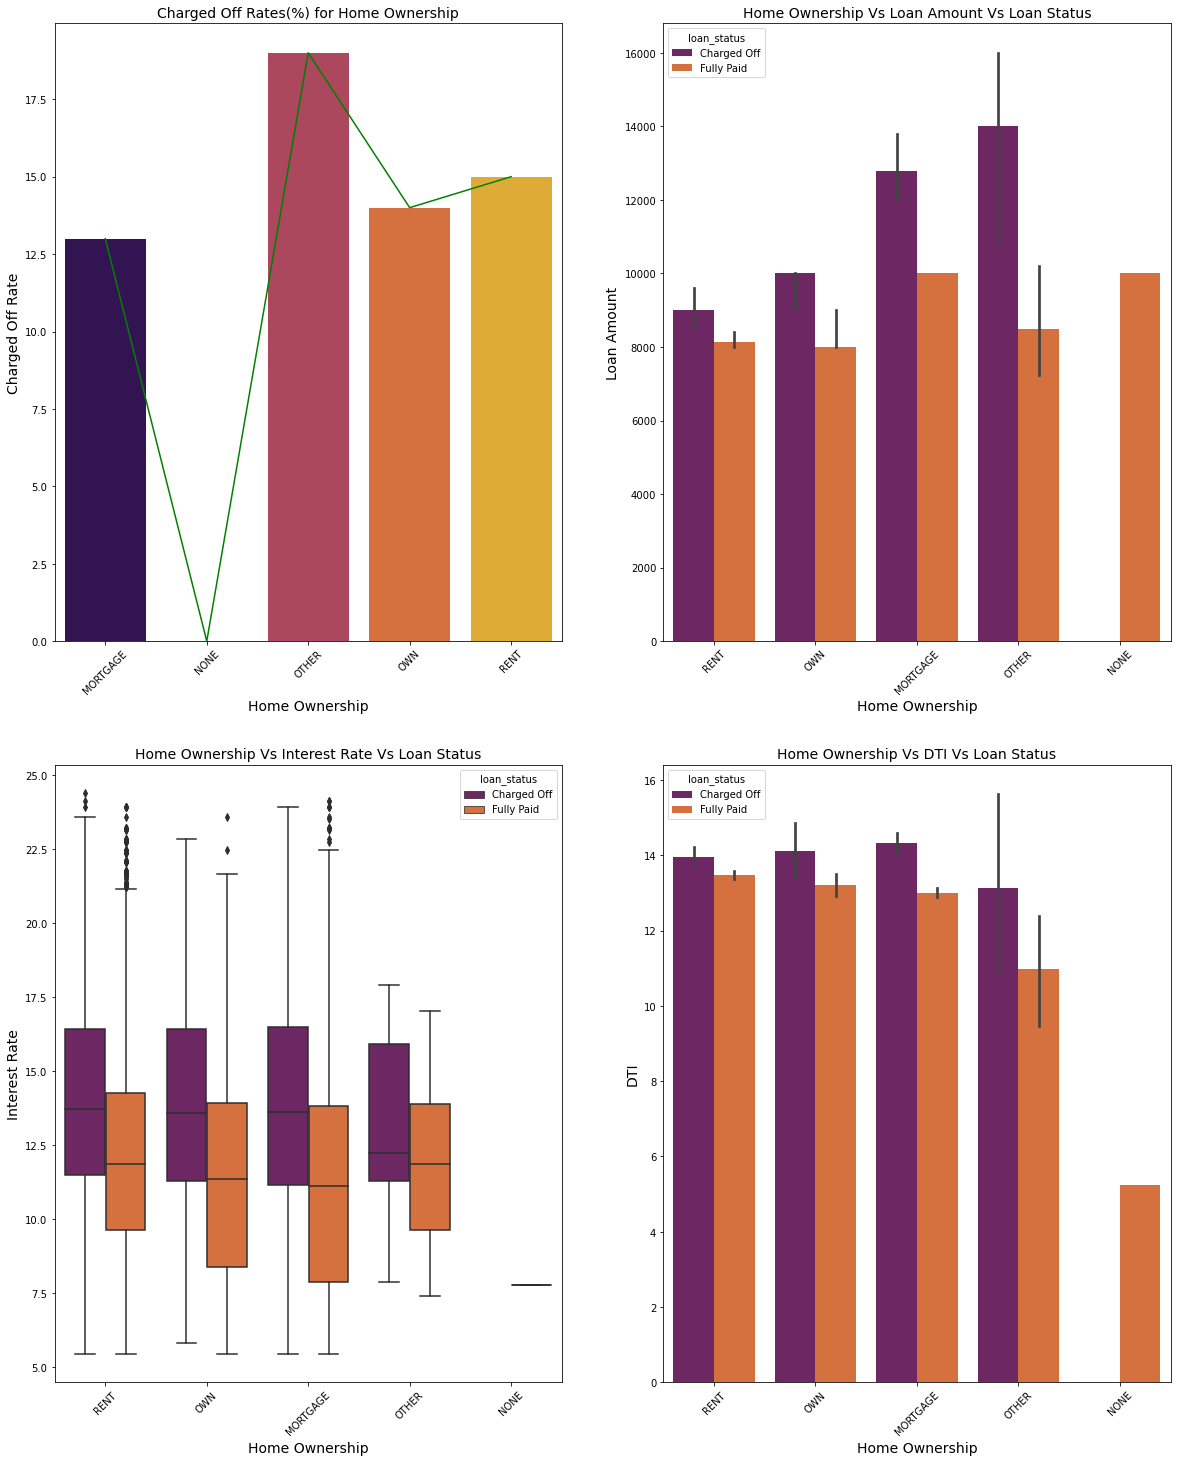

In [130]:
plot_bivariate('Home Ownership', pivot_house_ownership, 'home_ownership')

**Charged Off Rates are highest for the below 3 House Ownerships:**
1. OTHER - 19%
2. RENT - 15%
3. OWN - 14%

**The median loan amounts for Charged Off are clearly greater for all the house ownership types, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for all the house ownership types, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for all the house ownership types, which means applicants with higher debt to income ratio are more likely to charge off**

##### 2. Purpose

In [131]:
pivot_purpose = loan.pivot_table(values = 'id',
                      index = 'purpose',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_purpose['Charged Off Rate'] = 100*(round((pivot_purpose['Charged Off']/pivot_purpose['Total']), 2))

pivot_purpose[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
purpose,,,,
small_business,371,1027,1398,27.0
renewable_energy,15,72,87,17.0
educational,48,244,292,16.0
house,53,282,335,16.0
other,560,2996,3556,16.0
debt_consolidation,2558,14632,17190,15.0
medical,96,535,631,15.0
moving,82,450,532,15.0
vacation,49,288,337,15.0


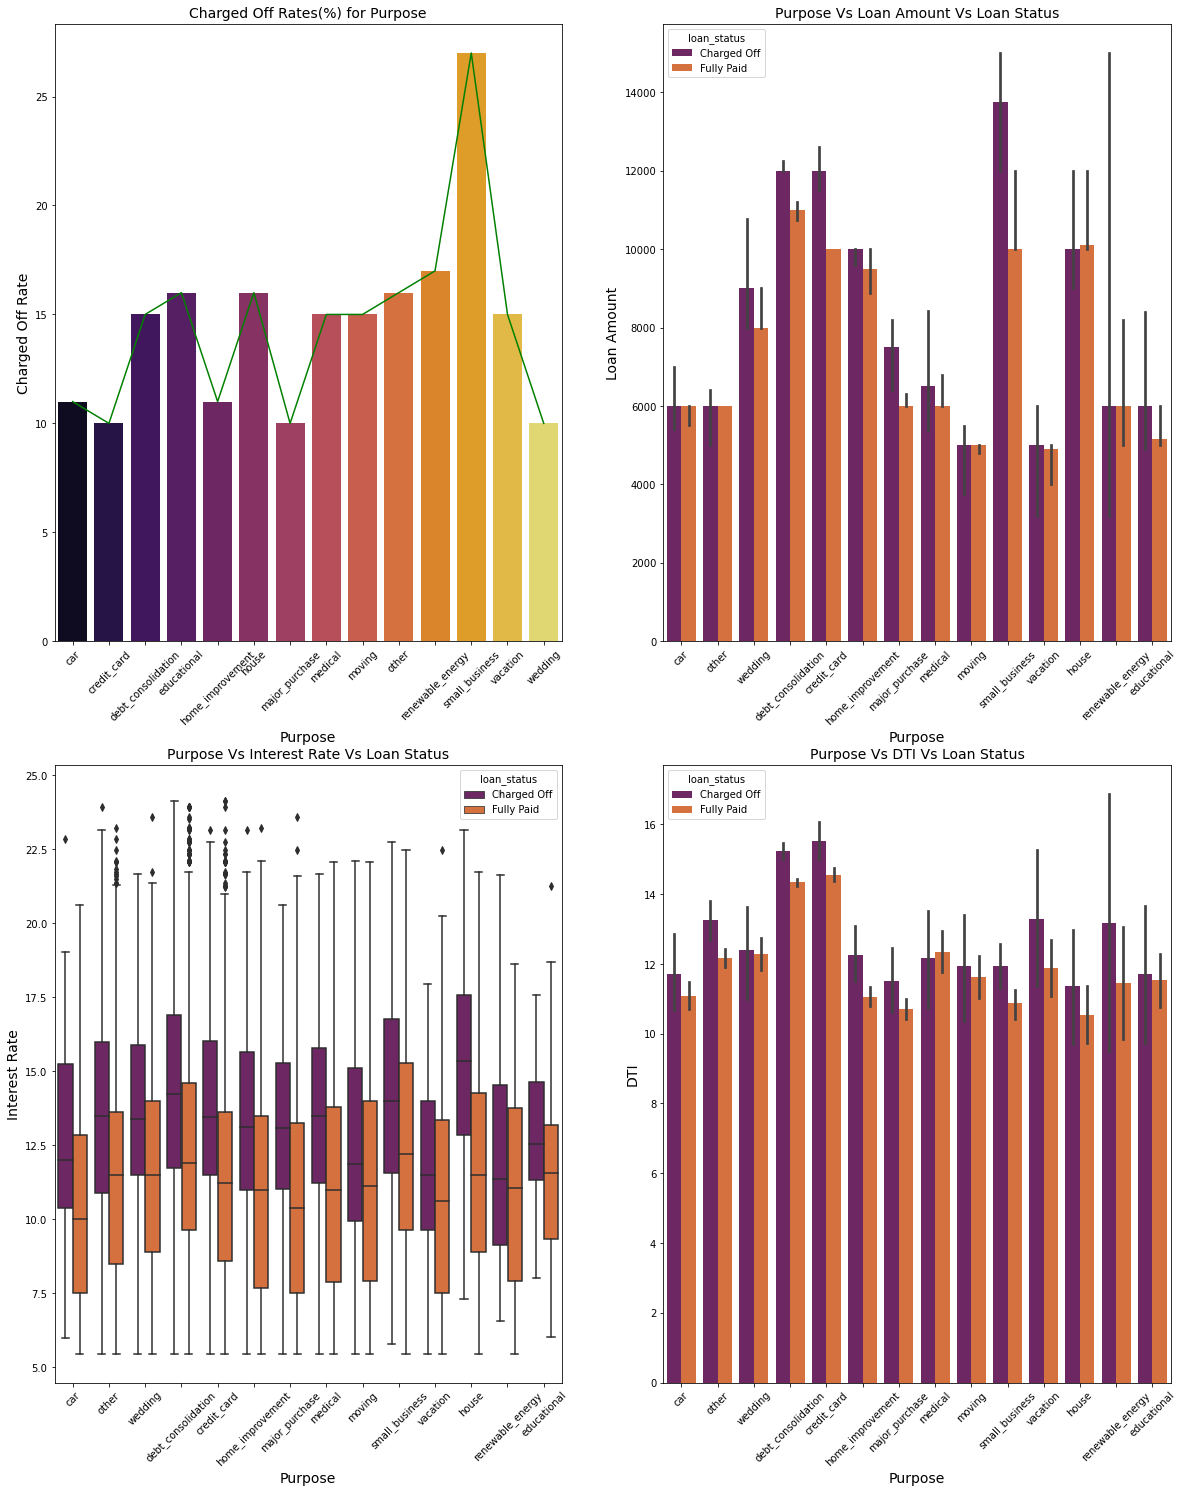

In [132]:
plot_bivariate('purpose', pivot_purpose, 'purpose')

**Borrowers with small businees, renewble energy and educational puposes are more likely to Charge Off.**

**The median loan amounts for Charged Off are clearly greater for all the purpose types, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for all the purpose types, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for all the purpose types, which means applicants with higher debt to income ratio are more likely to charge off**

##### 3. Interest Rate Bins

In [133]:
pivot_int_rate = loan.pivot_table(values = 'id',
                      index = 'int_rate_cats',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_int_rate['Charged Off Rate'] = 100*(round((pivot_int_rate['Charged Off']/pivot_int_rate['Total']), 2))

pivot_int_rate[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
int_rate_cats,,,,
15+,1637,5152,6789,24.0
12.5-15,1320,7029,8349,16.0
10-12.5,1117,7675,8792,13.0
0-10,710,10653,11363,6.0


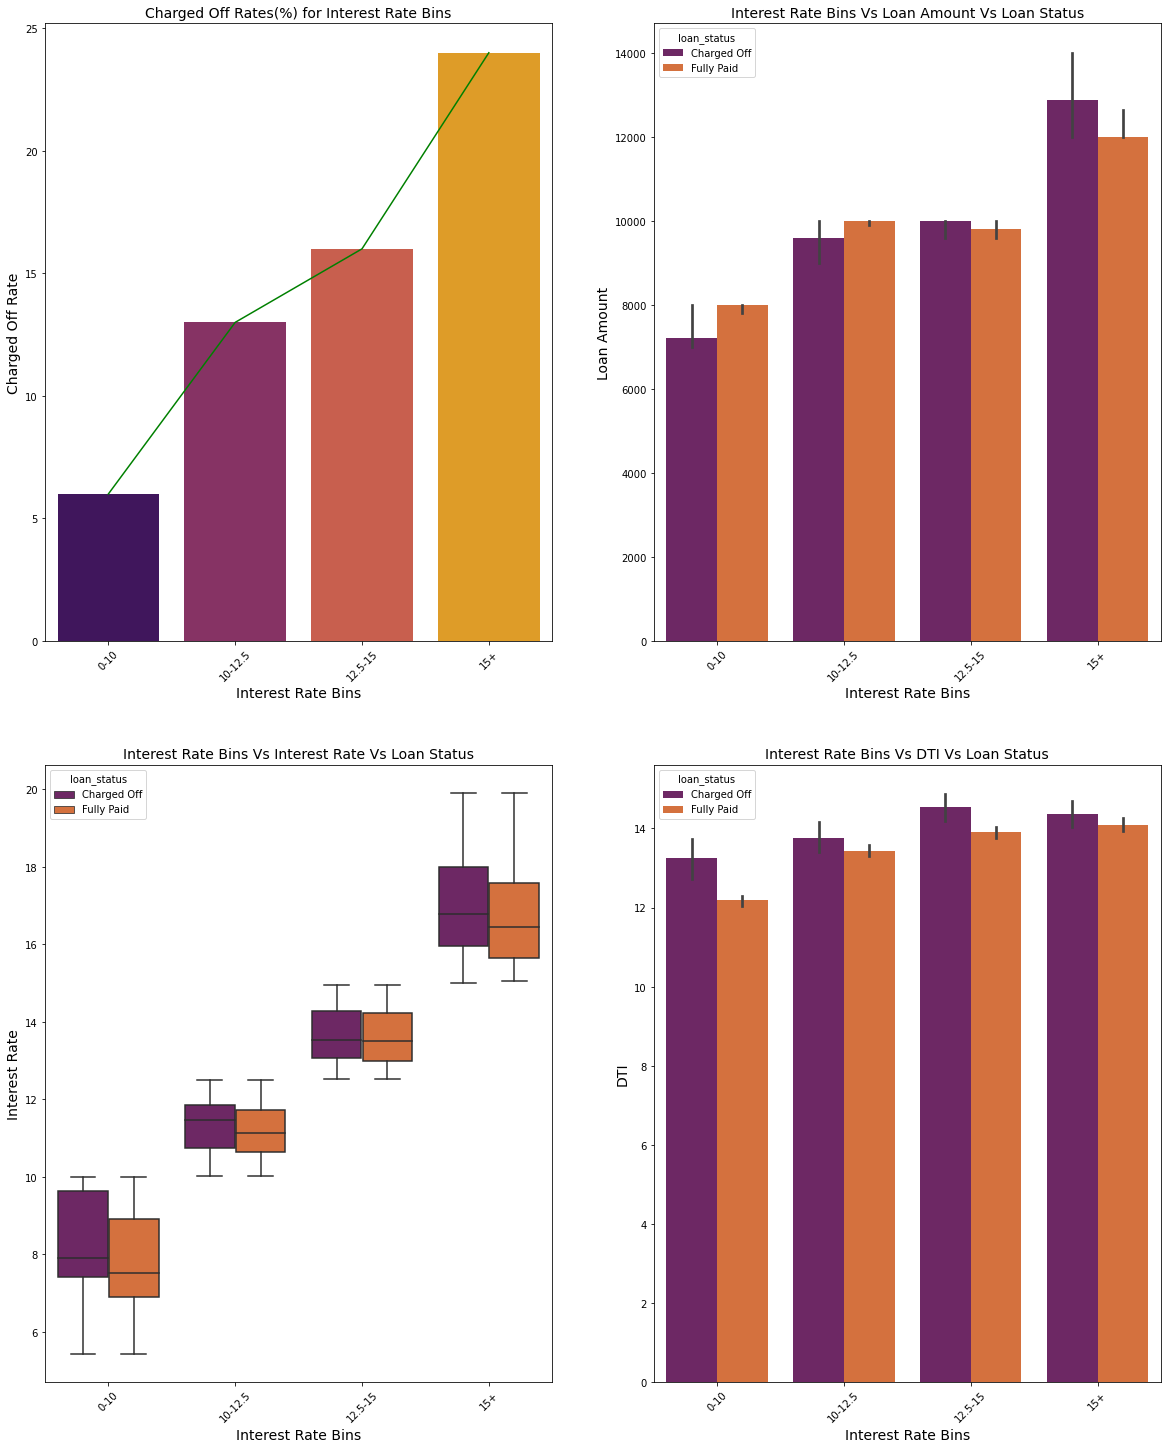

In [134]:
plot_bivariate('Interest Rate Bins', pivot_int_rate, 'int_rate_cats')

**Observation**

- Charged Off Rates are almost linearly increasing with the increasing Interest Rates.


- Charged Off Rates is highest for 15+ interest rates.


**The median interest rates for Charged Off are clearly greater for all the interest bins, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for all the interest bins, which means applicants with higher debt to income ratio are more likely to charge off**

##### 4. Term

In [135]:
pivot_term = loan.pivot_table(values = 'id',
                      index = 'term',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_term['Charged Off Rate'] = 100*(round((pivot_term['Charged Off']/pivot_term['Total']), 2))

pivot_term[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
term,,,,
60 months,2213,6777,8990,25.0
36 months,2842,24189,27031,11.0


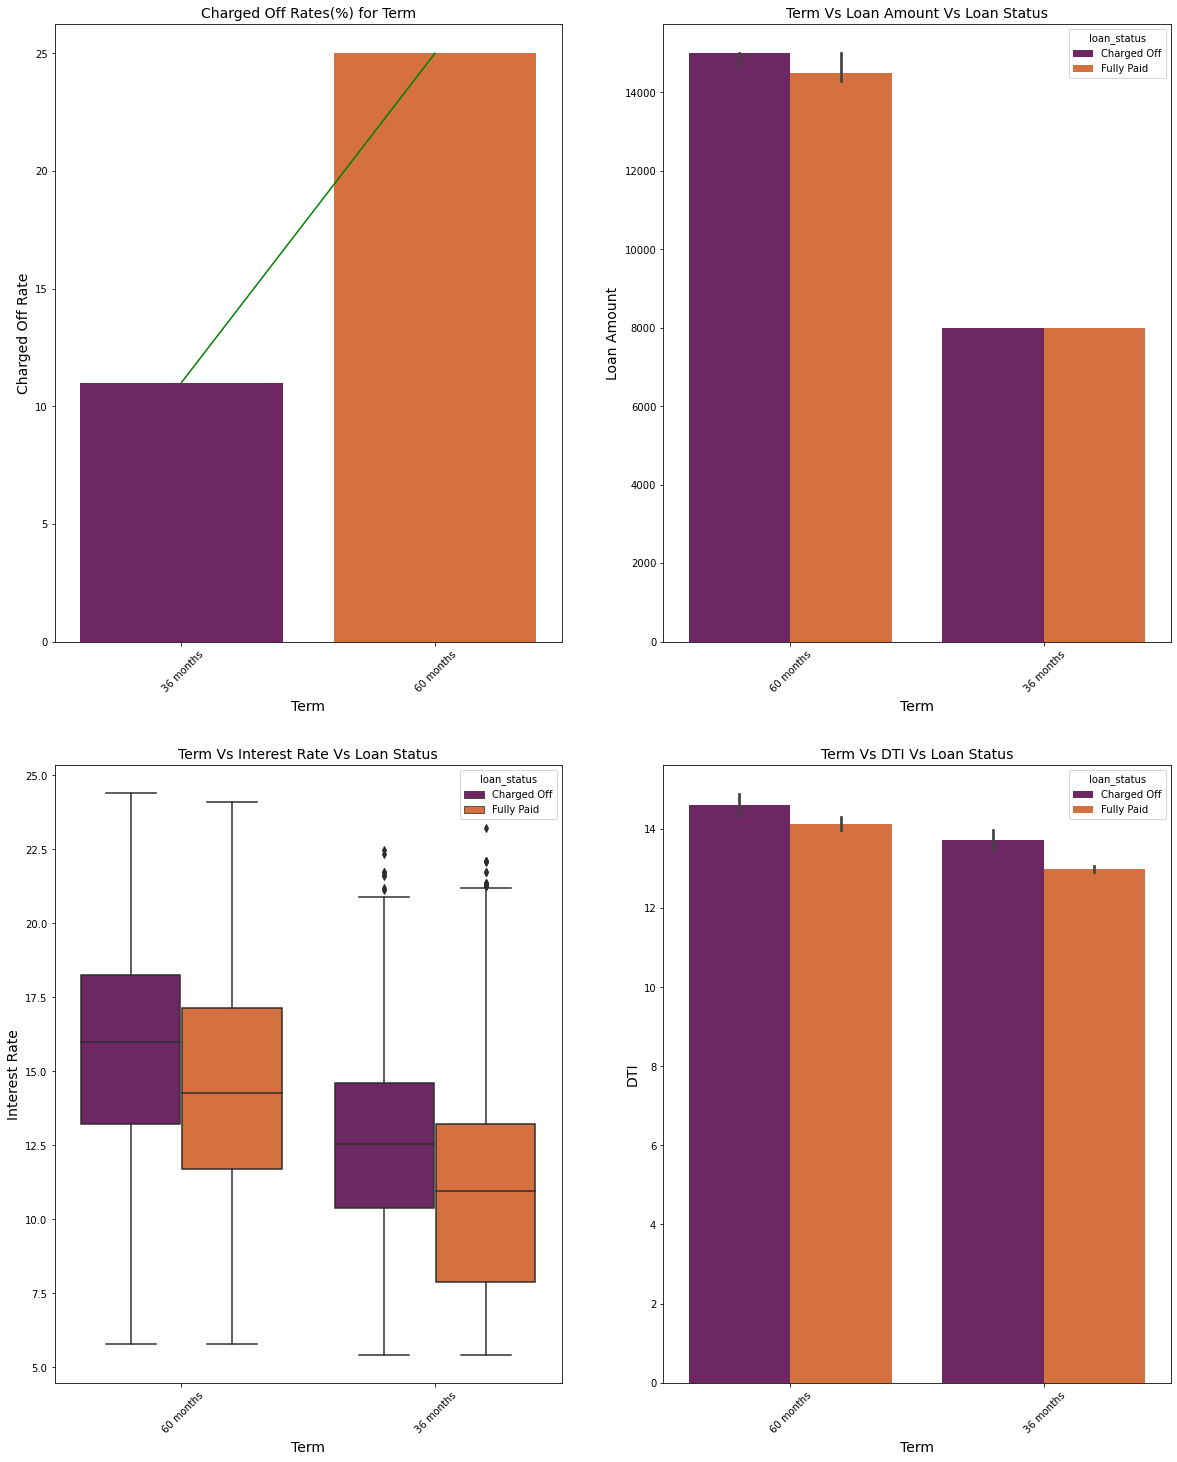

In [136]:
plot_bivariate('Term', pivot_term, 'term')

**Observation**

- Borrowers choosing 60 months term are more likely to Charge Off compared to 36 months.
    1. 60 months - 25%
    2. 36 months - 10%
    
**The median loan amounts for Charged Off are clearly greater for all the term types, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for all the term types, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for all the term types, which means applicants with higher debt to income ratio are more likely to charge off**

##### 5. Loan Amount bins

In [137]:
pivot_loan_amnt = loan.pivot_table(values = 'id',
                      index = 'loan_amnt_cats',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_loan_amnt['Charged Off Rate'] = 100*(round((pivot_loan_amnt['Charged Off']/pivot_loan_amnt['Total']), 2))

pivot_loan_amnt[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
loan_amnt_cats,,,,
28000 +,236,816,1052,22.0
21000-28000,493,2119,2612,19.0
14000-21000,1082,5593,6675,16.0
7000-14000,1622,10937,12559,13.0
0-7000,1622,11501,13123,12.0


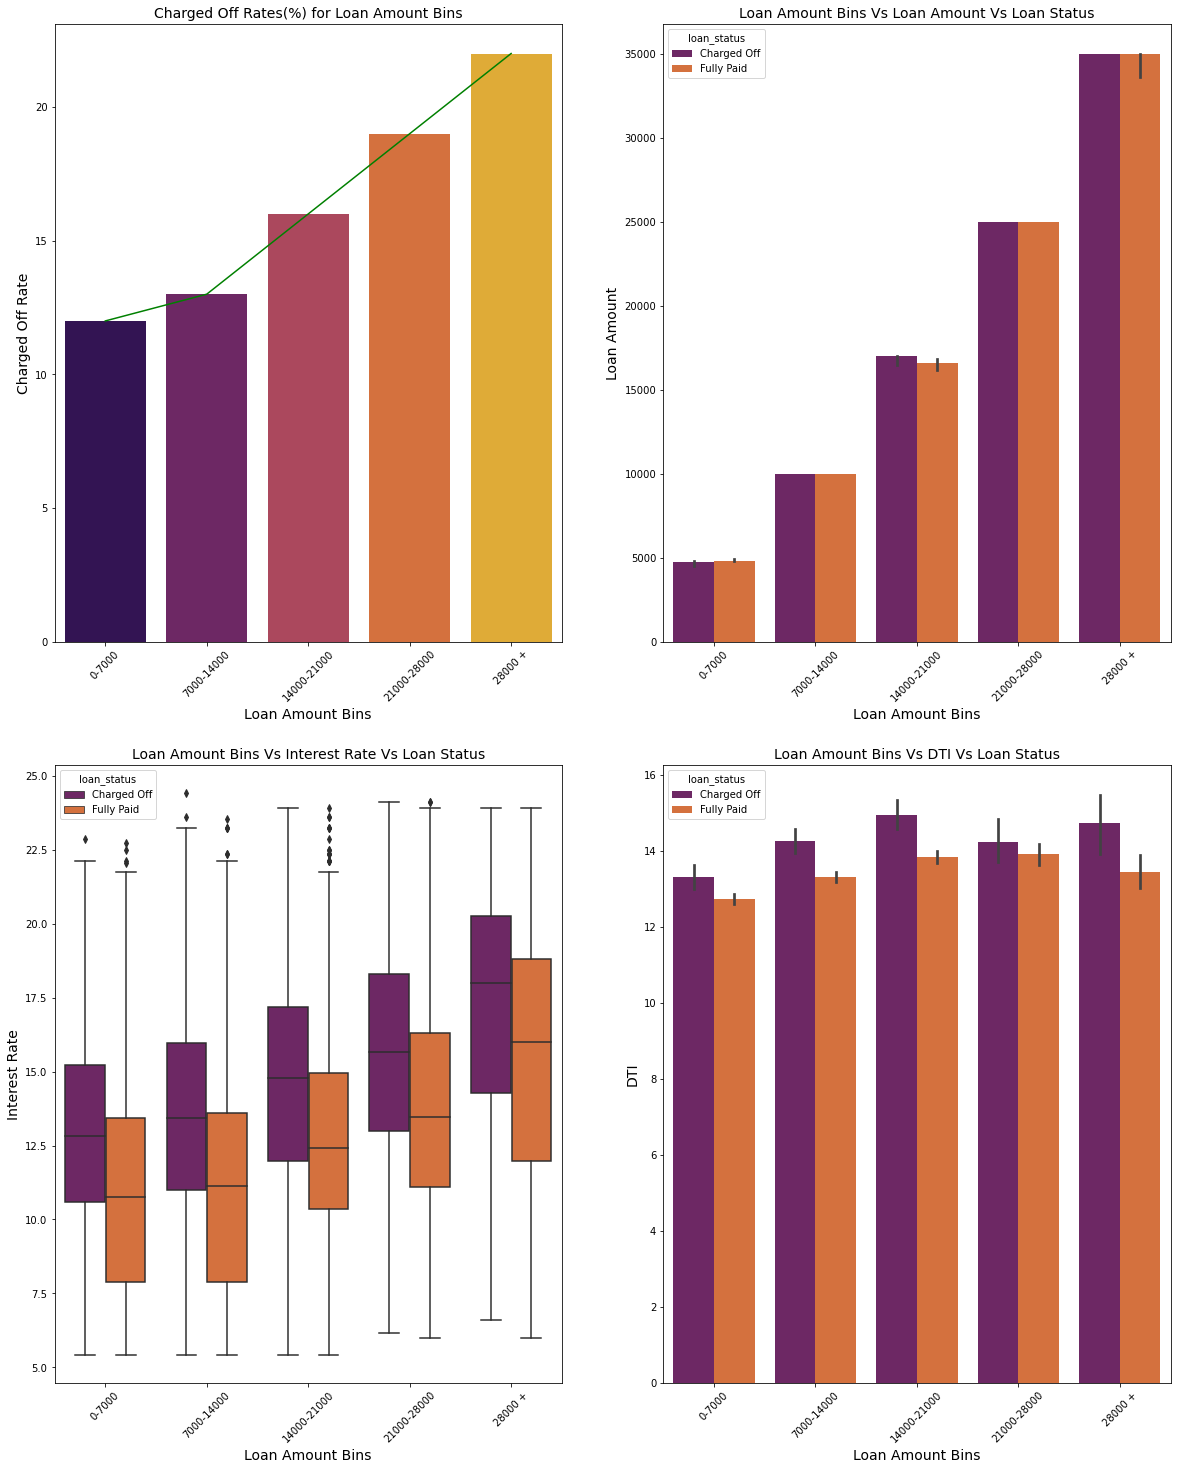

In [138]:
plot_bivariate('Loan Amount bins', pivot_loan_amnt, 'loan_amnt_cats')

**Observations:**
- Borrowers with higher loan amounts are more likely to Charge Off.

    1. 28000+      - 22%
    2. 21000-28000 - 19%
    3. 21000-14000 - 16%
    
**The median loan amounts for Charged Off are clearly greater for all the loan amount bins, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for all the loan amount bins, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for all the loan amount bins, which means applicants with higher debt to income ratio are more likely to charge off**

**Lower the loan amount lower the Interest rate so most of the borrowers can be attracted to take small ammount loans with lower rate of interest. These amount of loans decreases the chances of being charged off **

##### 6. Annual Income bins

In [139]:
pivot_annual_inc = loan.pivot_table(values = 'id',
                      index = 'annual_inc_cats',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_annual_inc['Charged Off Rate'] = 100*(round((pivot_annual_inc['Charged Off']/pivot_annual_inc['Total']), 2))

pivot_annual_inc[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
annual_inc_cats,,,,
0-20000,166,745,911,18.0
20000-40000,1334,6453,7787,17.0
40000-60000,1578,9045,10623,15.0
60000-80000,946,6341,7287,13.0
80000 +,1030,8369,9399,11.0


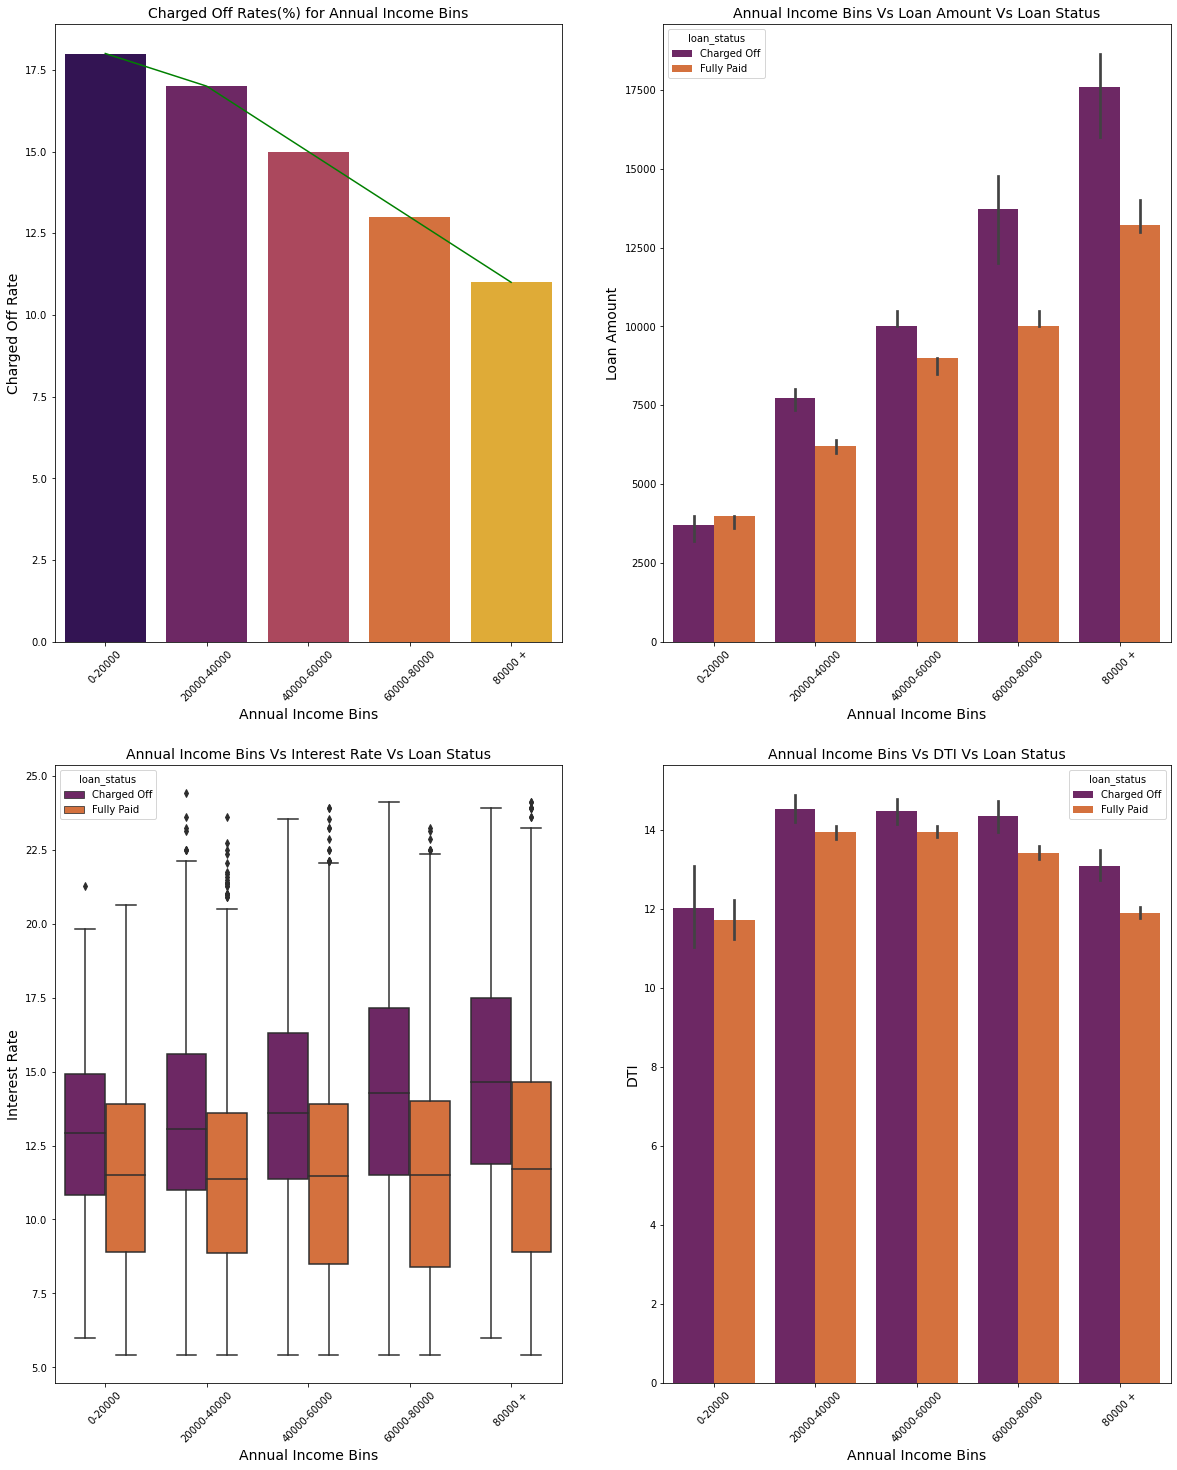

In [140]:
plot_bivariate('Annual Income bins', pivot_annual_inc, 'annual_inc_cats')

**Observations:**
- Borrowers with lower annual incomes are more likely to Charge Off.

    1. 0-20000 - 18%
    2. 20000-40000 - 17%
    3. 40000-60000 - 15%
    
**The median loan amounts for Charged Off are clearly greater for all the annual income bins, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for all the annual income bins, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for all the annual income bins, which means applicants with higher debt to income ratio are more likely to charge off**

##### 7. Installments bins

In [141]:
pivot_installment = loan.pivot_table(values = 'id',
                      index = 'installment_cats',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_installment['Charged Off Rate'] = 100*(round((pivot_installment['Charged Off']/pivot_installment['Total']), 2))

pivot_installment[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
installment_cats,,,,
800-1000,222,1018,1240,18.0
400-600,970,5241,6211,16.0
600-800,395,2084,2479,16.0
0-200,1570,10416,11986,13.0
200-400,1876,12021,13897,13.0
1200+,6,45,51,12.0
1000-1200,16,141,157,10.0


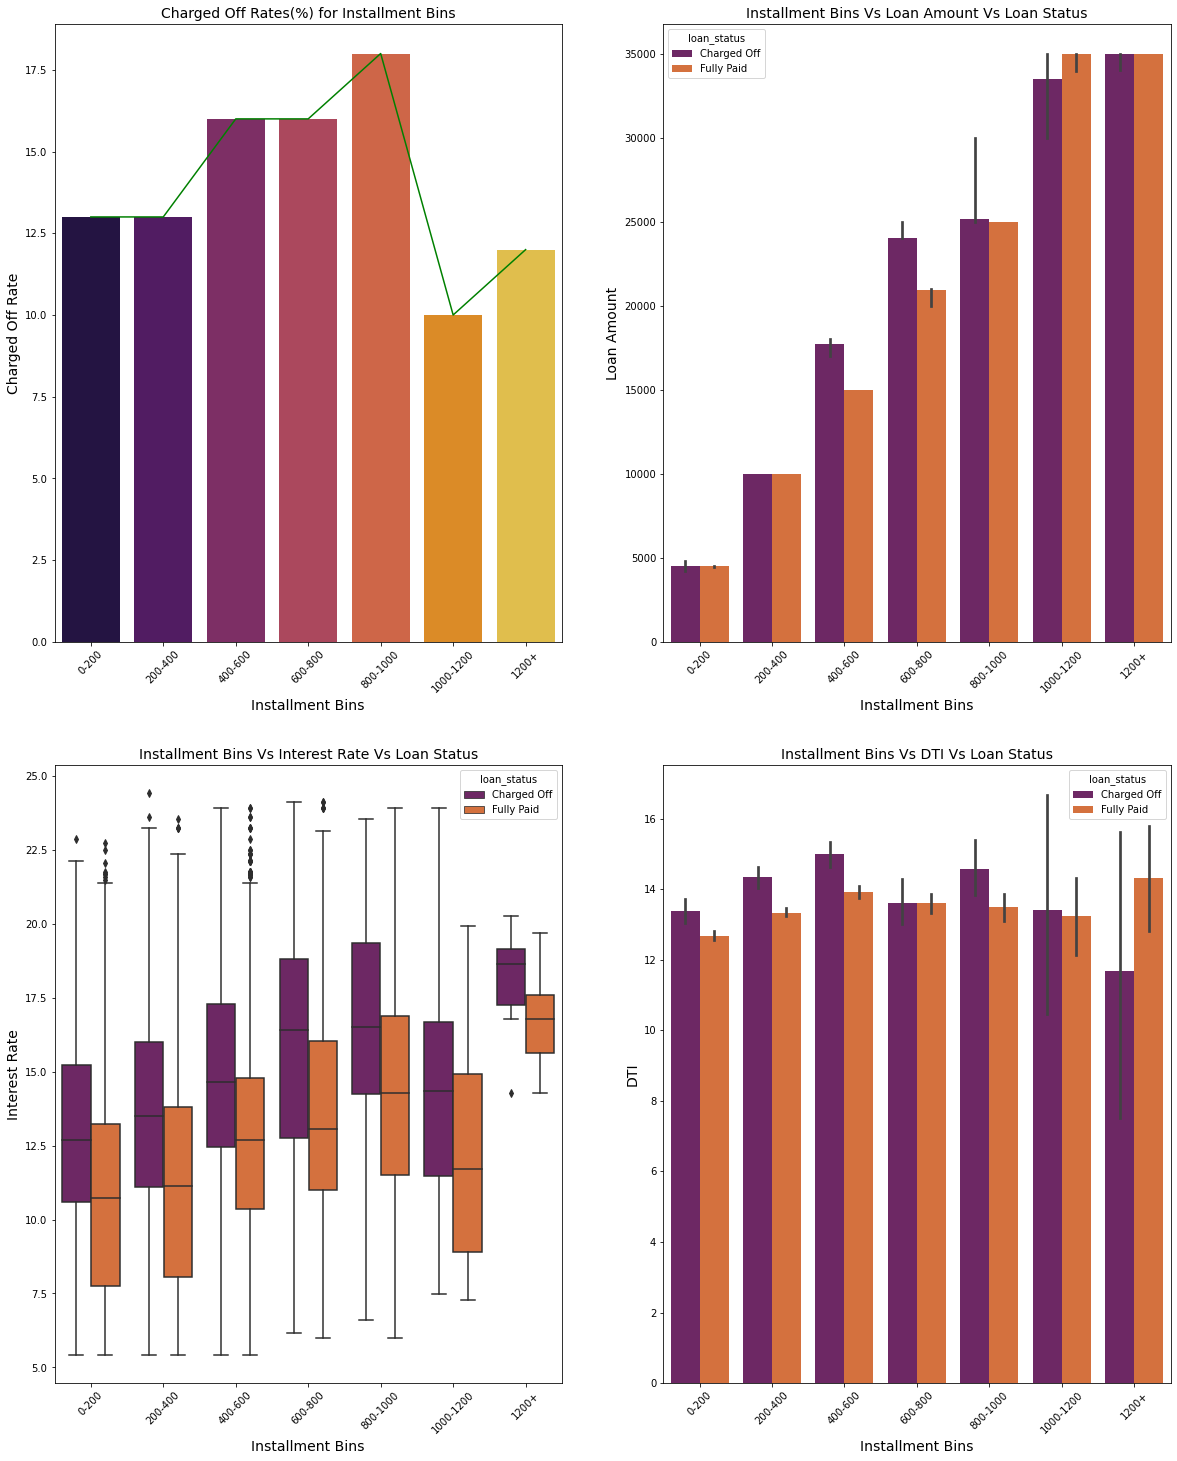

In [142]:
plot_bivariate('Installment bins', pivot_installment, 'installment_cats')

**Observations:**
- Borrowers with higher Installemets are more likely to Charge Off.
    1. 800-1000 - 17%
    2. 600-800 - 16%
    3. 400-600 - 16%
    
**The median loan amounts for Charged Off are clearly greater for all the installment bins, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for all the installment bins, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for all the installment bins, which means applicants with higher debt to income ratio are more likely to charge off**

##### 8. DTI (Debt To Income Ratio) Bins

In [143]:
pivot_dti = loan.pivot_table(values = 'id',
                      index = 'dti_cats',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_dti['Charged Off Rate'] = 100*(round((pivot_dti['Charged Off']/pivot_dti['Total']), 2))

pivot_dti[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
dti_cats,,,,
25+,1018,5213,6231,16.0
15-20,1261,7043,8304,15.0
10-15,1286,7770,9056,14.0
0-5,513,3914,4427,12.0
5-10,875,6398,7273,12.0


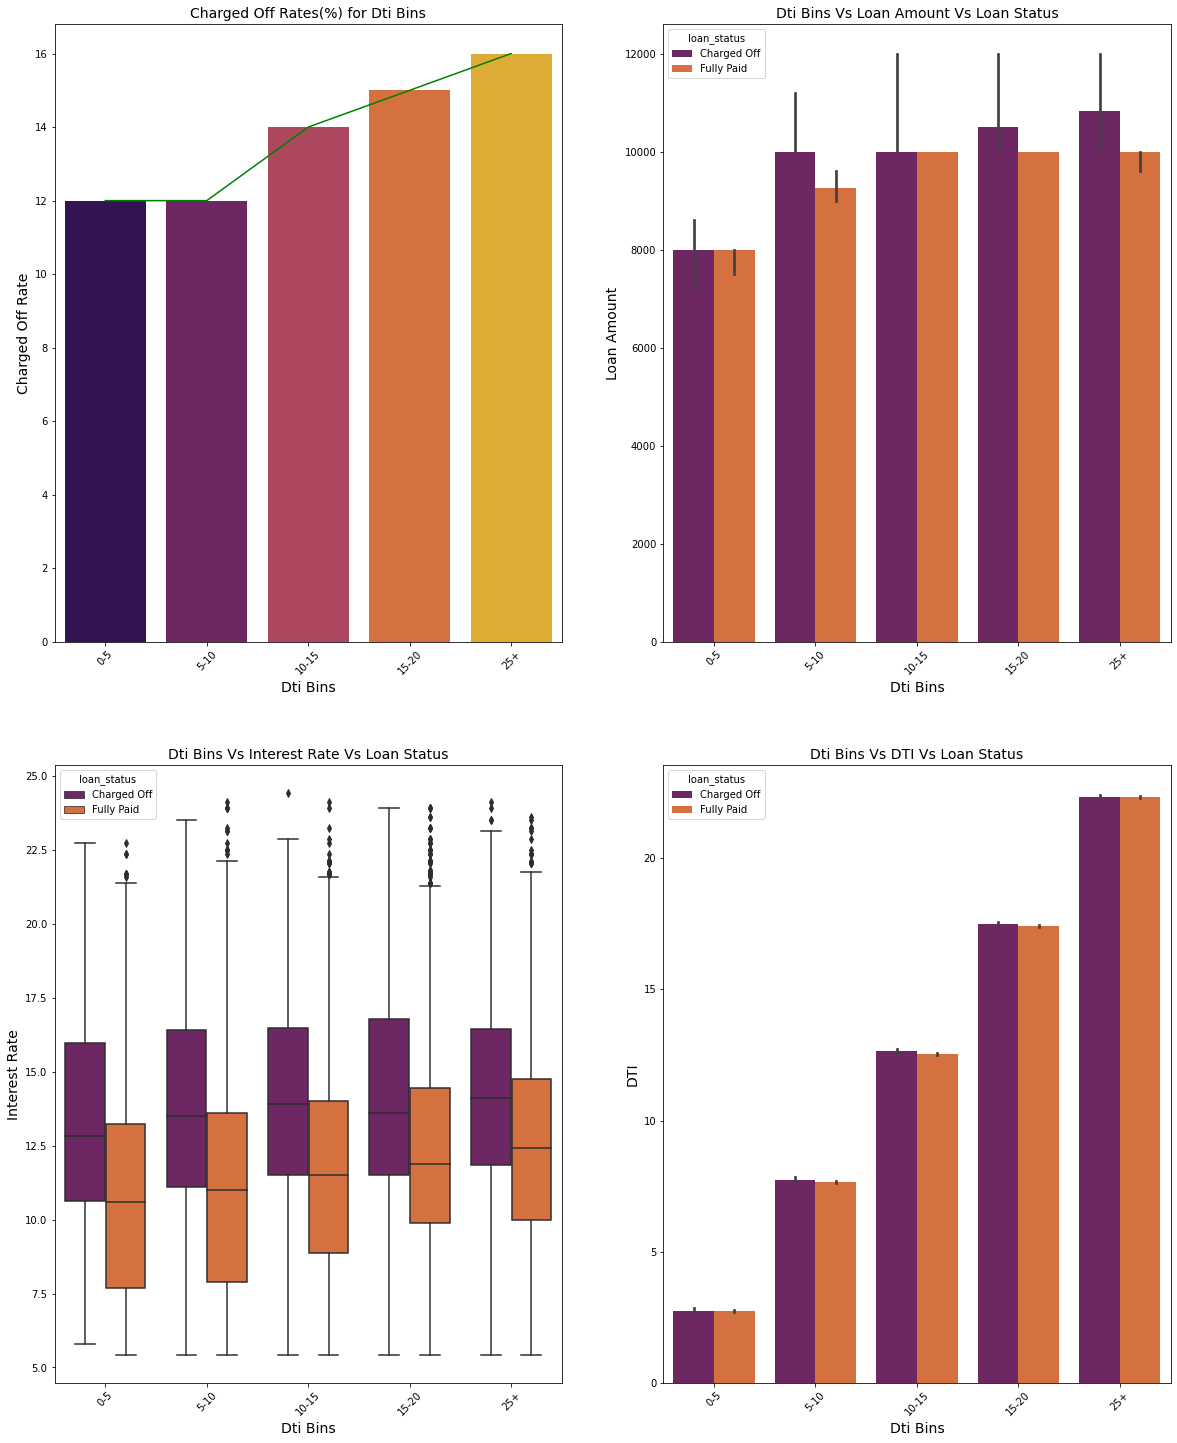

In [144]:
plot_bivariate('DTI bins', pivot_dti, 'dti_cats')

**Observations:**
- Borrowers with higher DTI are more likely to Charge Off.

    1. 25+ - 16%
    2. 15-20 - 15%
    3. 10-15 - 14%
    
**The median loan amounts for Charged Off are clearly greater for all the DTI bins, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for all the DTI bins, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for all the DTI bins, which means applicants with higher debt to income ratio are more likely to charge off**

##### 9. Employment Length

In [145]:
pivot_emp_length = loan.pivot_table(values = 'id',
                      index = 'emp_length',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_emp_length['Charged Off Rate'] = 100*(round((pivot_emp_length['Charged Off']/pivot_emp_length['Total']), 6))

pivot_emp_length[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
emp_length,,,,
10 years,1261,6885,8146,15.4800
7 years,253,1406,1659,15.2502
8 years,194,1192,1386,13.9971
6 years,293,1801,2094,13.9924
5 years,426,2650,3076,13.8492
1 year,422,2629,3051,13.8315
3 years,527,3363,3890,13.5476
4 years,439,2812,3251,13.5035
0 year,551,3557,4108,13.4129


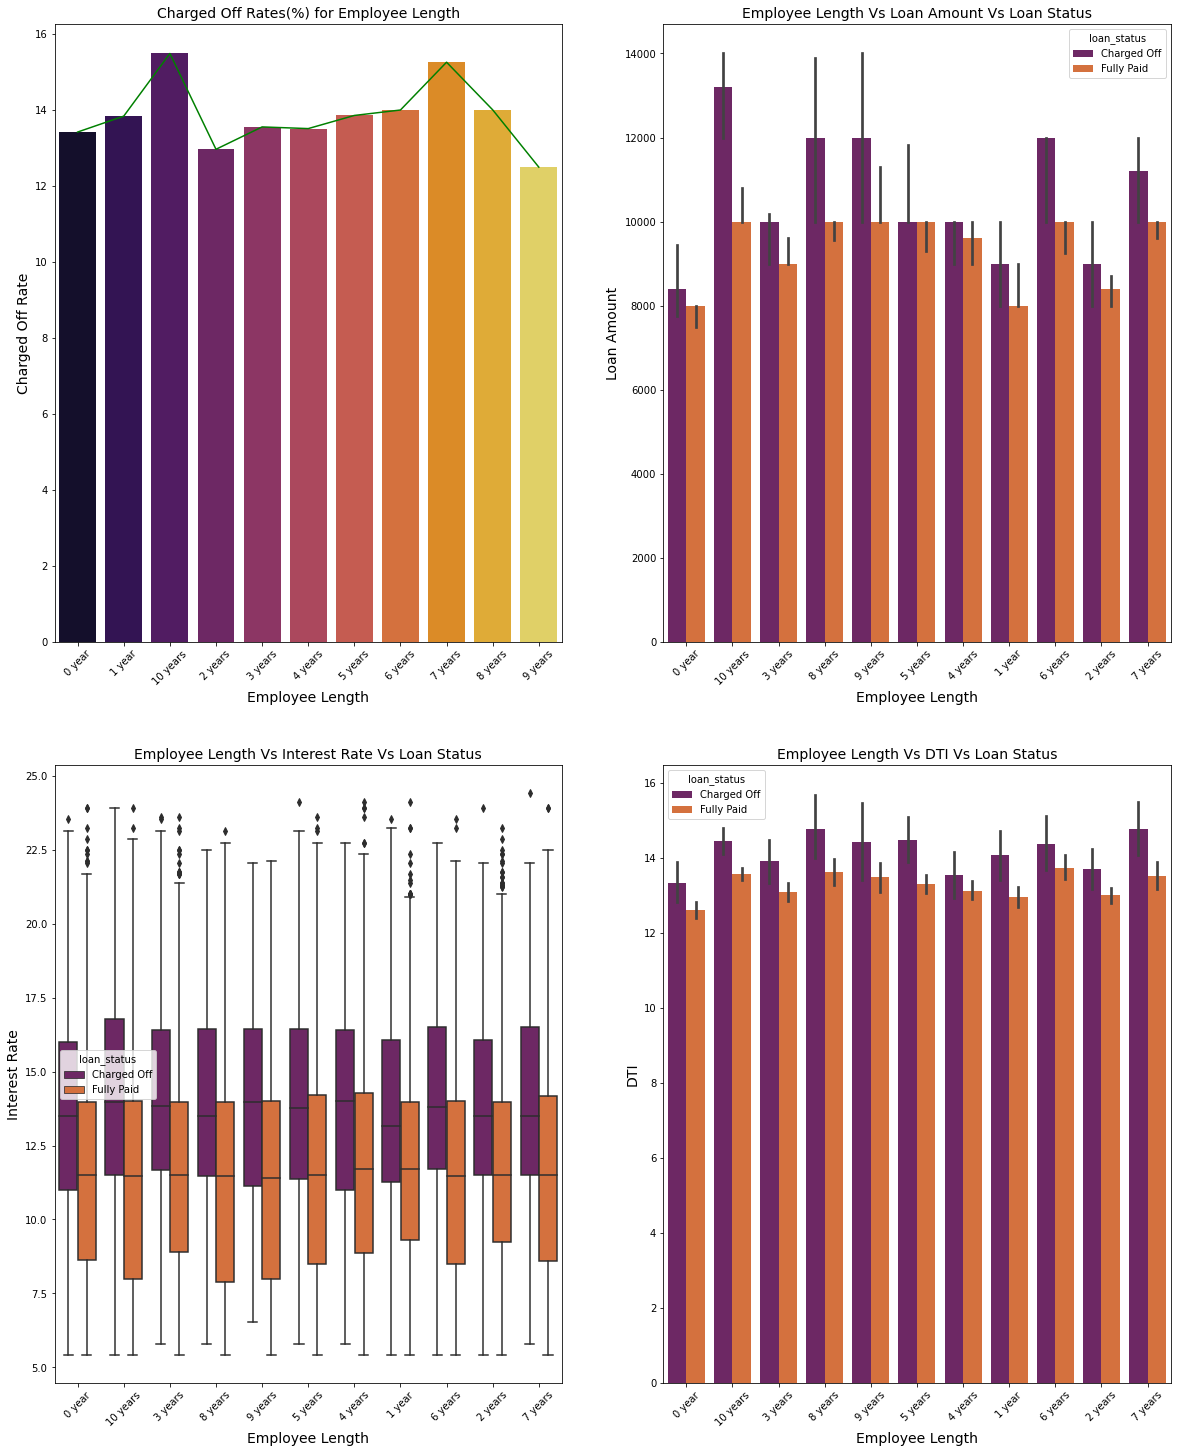

In [146]:
plot_bivariate('Employee Length', pivot_emp_length, 'emp_length')

**Observations:**
- Charged Off Rates are highest for the below 3 employment lengths:

    1. 10+ years - 15.35%
    2. 7 years - 15.14%
    3. 8 years - 14.03%
    
**The median loan amounts for Charged Off are clearly greater for all the employment length types, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for all the employment length types, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for all the employment length types, which means applicants with higher debt to income ratio are more likely to charge off**

##### 10. Grade

In [147]:
pivot_grade = loan.pivot_table(values = 'id',
                      index = 'grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_grade['Charged Off Rate'] = 100*(round((pivot_grade['Charged Off']/pivot_grade['Total']), 6))

pivot_grade[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
grade,,,,
G,93,191,284,32.7465
F,291,625,916,31.7686
E,658,1856,2514,26.1734
D,1011,3760,4771,21.1905
C,1203,6154,7357,16.3518
B,1281,9636,10917,11.7340
A,518,8744,9262,5.5927


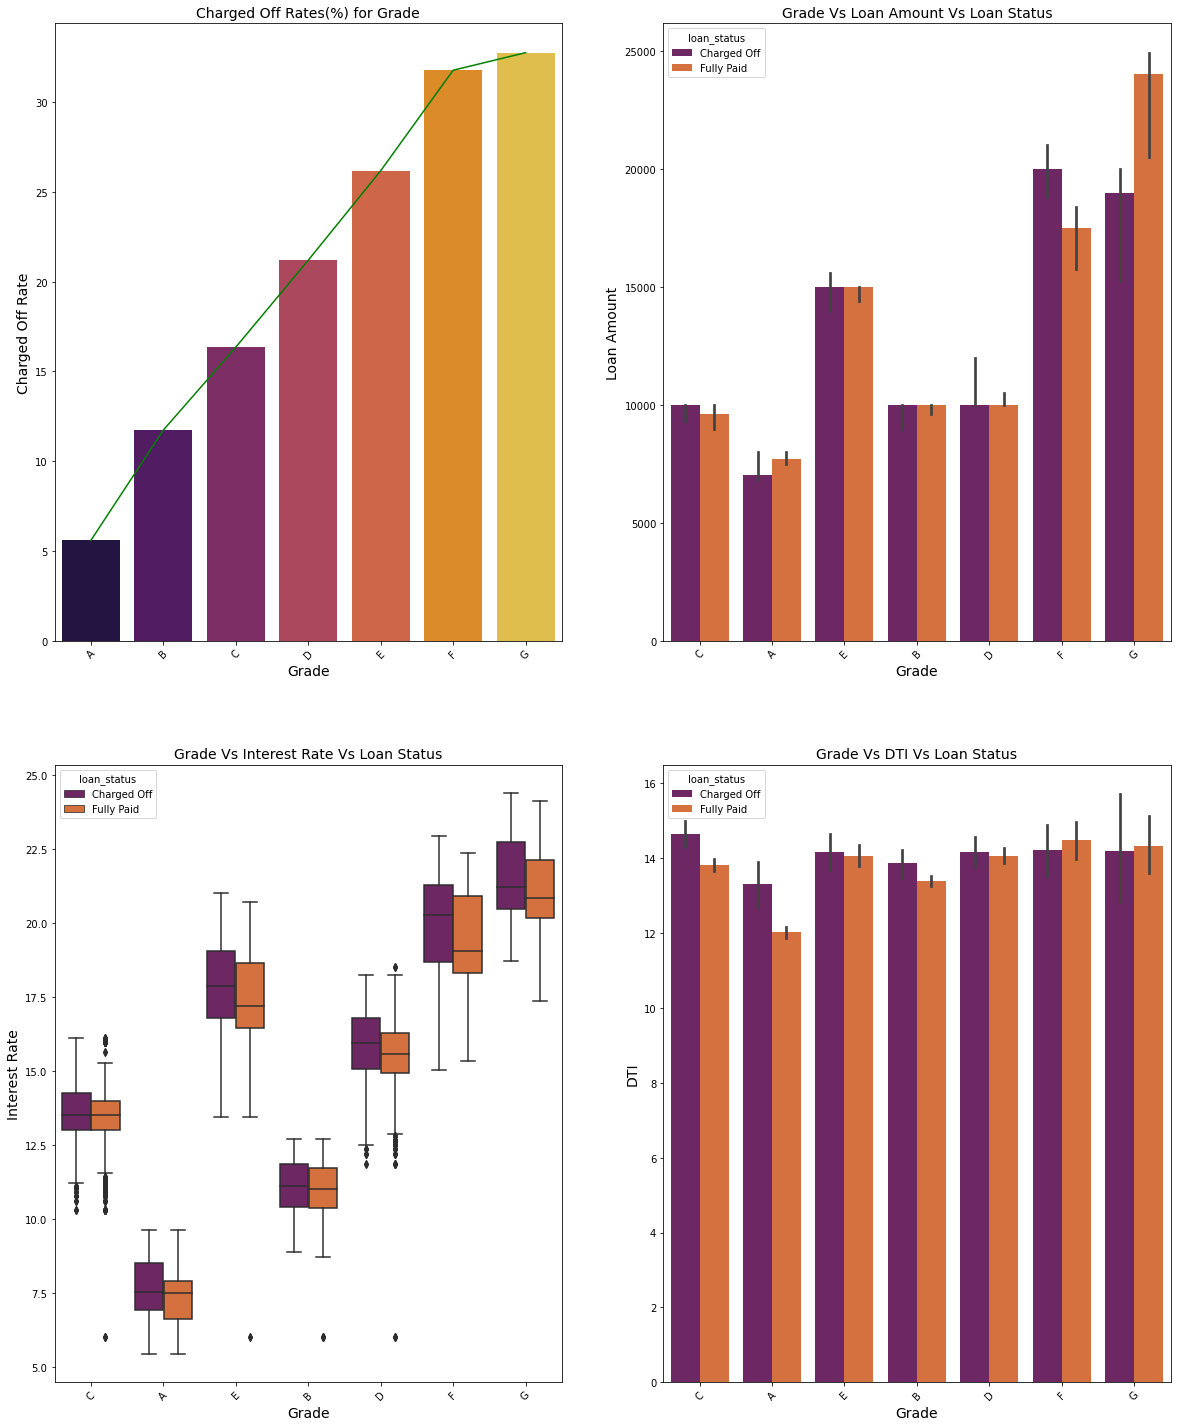

In [148]:
plot_bivariate('Grade', pivot_grade, 'grade')

**Observations:**
Borrowers with higher Grades are more likely to Charge Off. A < B < C < D < E < F < G
1. G - 32.97%
2. F - 31.70%
3. E - 26.11%

**The median loan amounts for Charged Off are clearly greater for majority of the grade types, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for majority of the grade types, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for majority of the grade types, which means applicants with higher debt to income ratio are more likely to charge off**

##### 11. Sub Grade

In [149]:
pivot_sub_grade = loan.pivot_table(values = 'id',
                      index = 'sub_grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_sub_grade['Charged Off Rate'] = 100*(round((pivot_sub_grade['Charged Off']/pivot_sub_grade['Total']), 6))

pivot_sub_grade[:-1].sort_values(by='Charged Off Rate', ascending = False).head(10)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
sub_grade,,,,
F5,47,53,100,47.0000
G3,18,23,41,43.9024
G2,27,47,74,36.4865
G5,9,17,26,34.6154
F4,48,91,139,34.5324
F2,64,155,219,29.2237
G1,26,63,89,29.2135
E4,117,286,403,29.0323
F3,47,116,163,28.8344


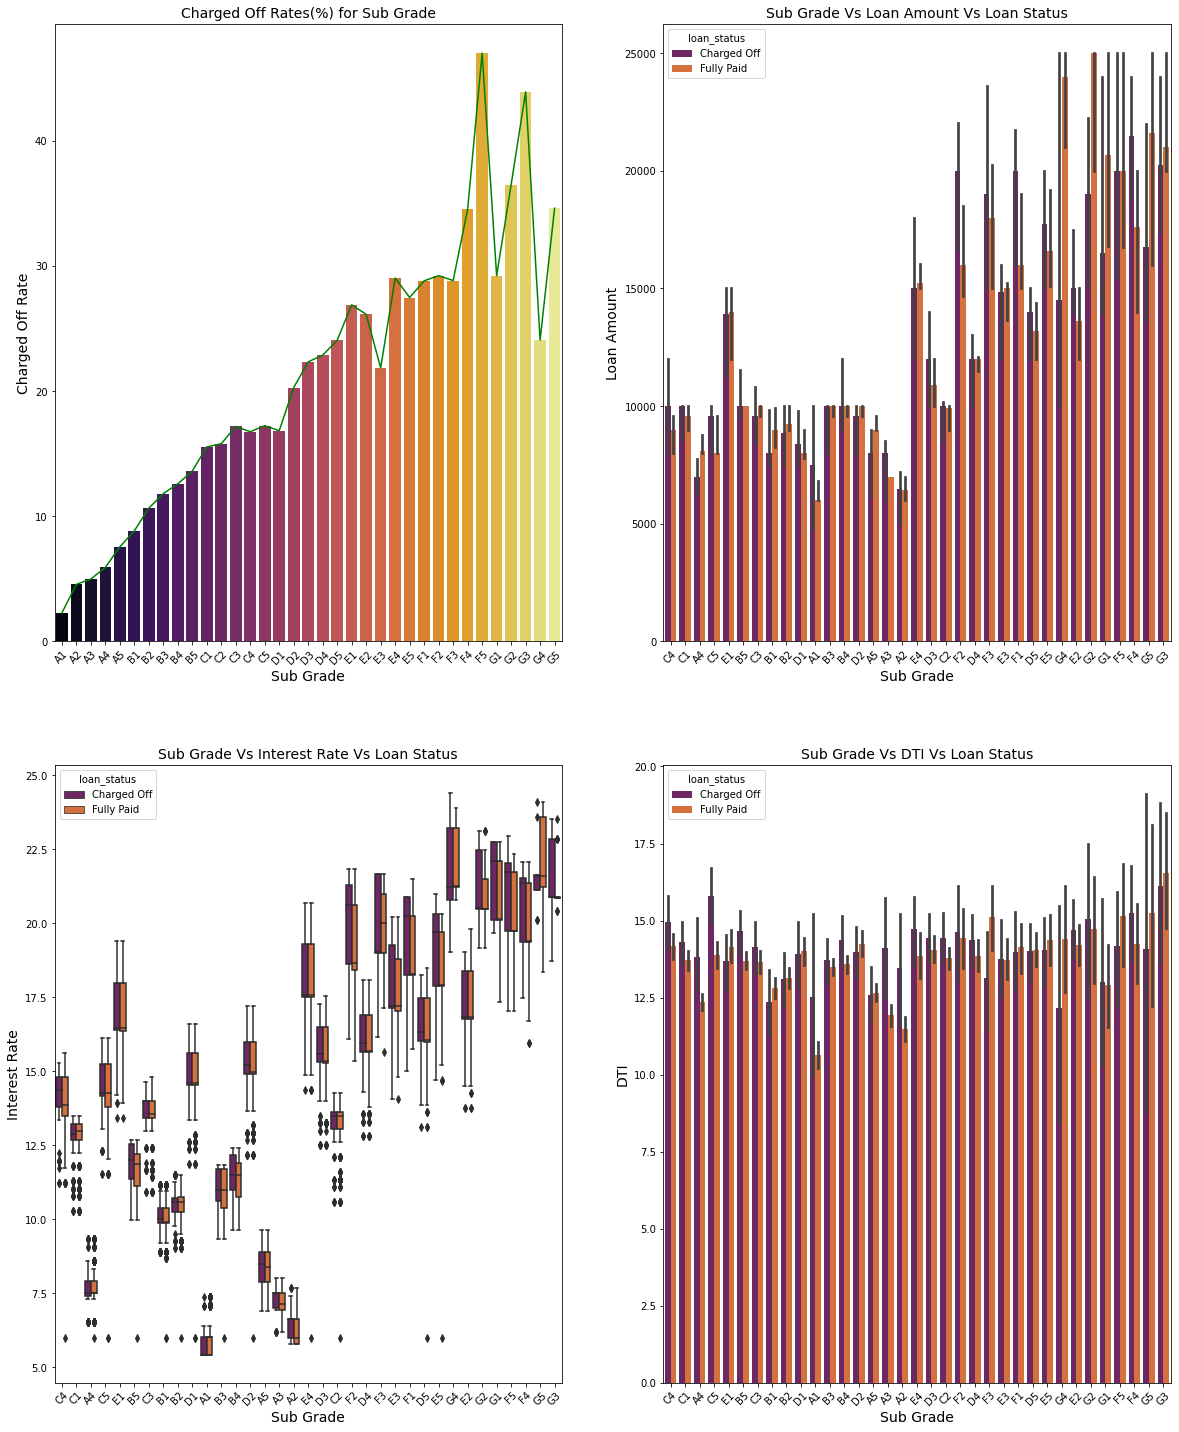

In [150]:
plot_bivariate('Sub Grade', pivot_sub_grade, 'sub_grade')

**Observations:**
- Borrowers with higher sub-grade (within a given grade) are more likely to Charge Off. 

        Grades Order - A < B < C < D < E < F < G

        Sub-grades Order - 1 < 2 < 3 < 4 < 5 < 6 < 7
        
**The median loan amounts for Charged Off are clearly greater for majority of the sub grade types, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for majority of the sub grade types, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for majority of the sub grade types, which means applicants with higher debt to income ratio are more likely to charge off**

##### 12. Issued Year

In [151]:
pivot_issue_d_year = loan.pivot_table(values = 'id',
                      index = 'issue_d_year',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_issue_d_year['Charged Off Rate'] = 100*(round((pivot_issue_d_year['Charged Off']/pivot_issue_d_year['Total']), 6))

pivot_issue_d_year[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
issue_d_year,,,,
2007,42,185,227,18.5022
2008,231,1254,1485,15.5556
2011,2931,16159,19090,15.3536
2009,542,3882,4424,12.2514
2010,1309,9486,10795,12.1260


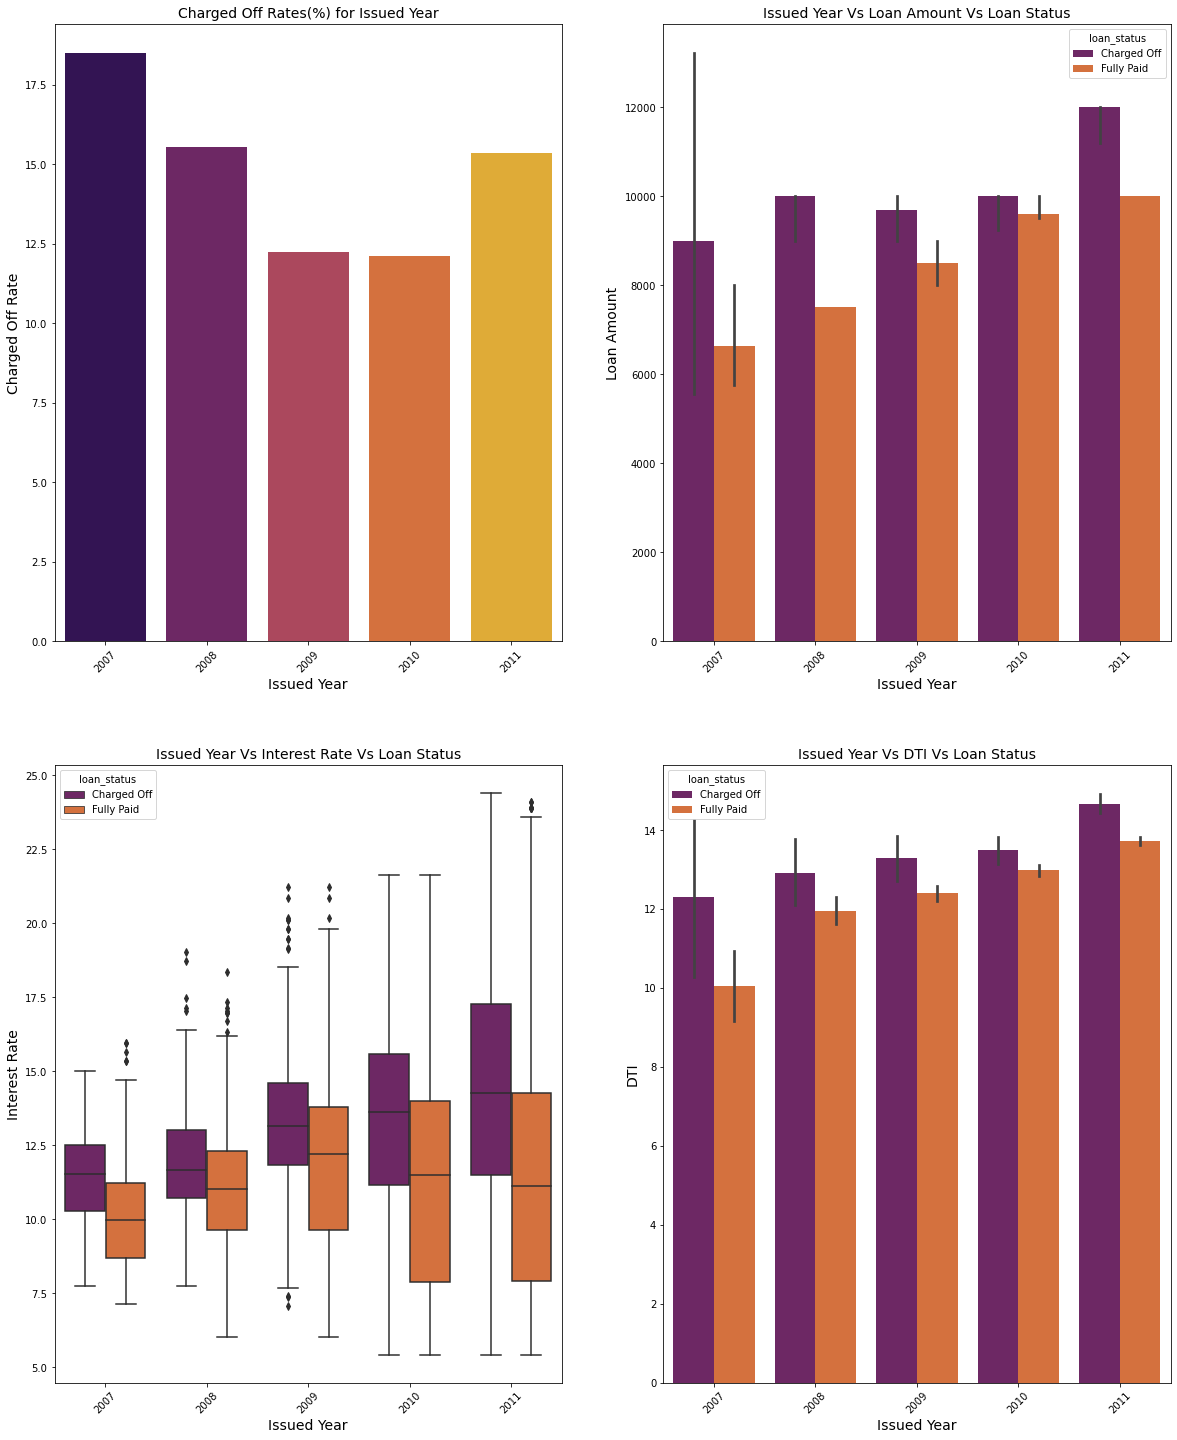

In [152]:
plot_bivariate('Issued Year', pivot_issue_d_year, 'issue_d_year')

**Observations:**

- From the above plot we can infer that Charge off rates went down from 2007-2009 and then started to increase from 2009-2011.
1. 2007 - 33.33%
2. 2011 - 15.35%
3. 2008 - 15.19%

**The median loan amounts for Charged Off are clearly greater for all of the issued years, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for all of the issued years, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for all of the issued years, which means applicants with higher debt to income ratio are more likely to charge off**

##### 13. Address State

In [153]:
pivot_addr_state = loan.pivot_table(values = 'id',
                      index = 'addr_state',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

pivot_addr_state['Charged Off Rate'] = 100*(round((pivot_addr_state['Charged Off']/pivot_addr_state['Total']), 6))

pivot_addr_state[:-1].sort_values(by='Charged Off Rate', ascending = False)

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
addr_state,,,,
NE,3,2,5,60.0000
NV,97,348,445,21.7978
AK,15,59,74,20.2703
ID,1,4,5,20.0000
SD,10,46,56,17.8571
FL,454,2130,2584,17.5697
HI,26,128,154,16.8831
NM,28,140,168,16.6667
GA,201,1076,1277,15.7400


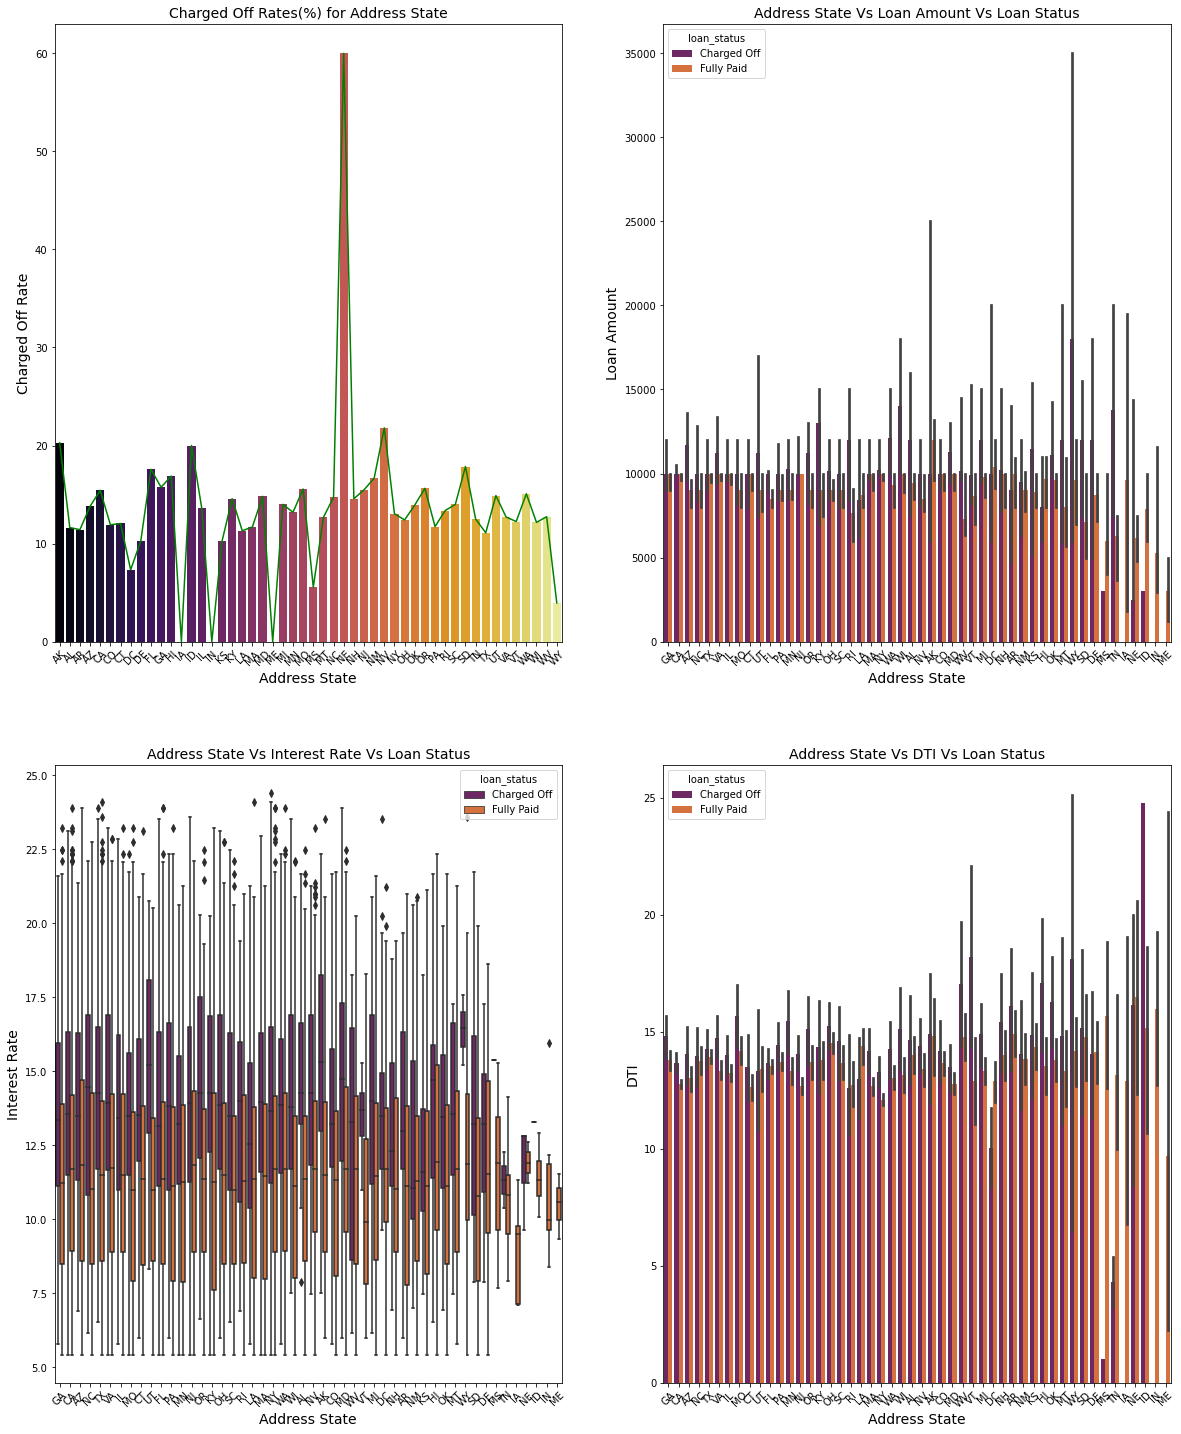

In [154]:
plot_bivariate('Address State', pivot_addr_state, 'addr_state')

**Observations:**
- Following states have highest Charge Off Rates:
    1. NV - 21.94%
    2. AK - 20.54%
    3. TN - 20.00%
    4. SD - 18.18%
    5. FL - 17.23%
    
**The median loan amounts for Charged Off are clearly greater for majority of the address states, which means applicants with higher loan amount requests are more likely to charge off**

**The median interest rates for Charged Off are clearly greater for majority of the address states, which means applicants with higher interest rates are more likely to charge off**

**The average DTI for Charged Off are clearly greater for majority of the address states, which means applicants with higher debt to income ratio are more likely to charge off**

## Bivariate Analysis: Quantitative Variables


##### Loan amount vs DTI

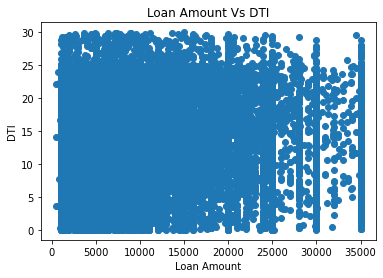

In [155]:
plt.scatter(loan.loan_amnt,loan.dti)
plt.title('Loan Amount Vs DTI')
plt.xlabel('Loan Amount')
plt.ylabel('DTI')
plt.show()

**Observations:**
- As the scatter is more dense for the low loan amount and applicants with low DTI, LC can consider applicants with lower DTI as there is less risk of loan to be defaulted.


###### Loan amount over time and Average Loan amount over time

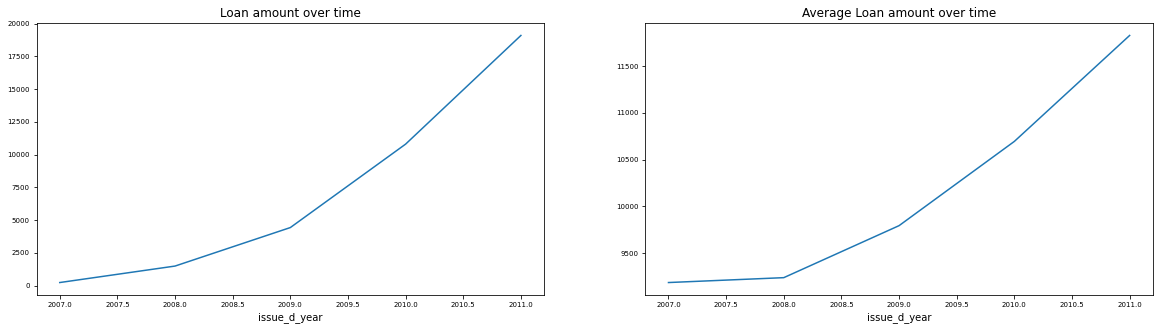

In [156]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.title('Loan amount over time')

plt.subplot(1,2,2)
loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.title('Average Loan amount over time')
plt.show()

**Observation:**
-  Average loan amount dropped sharply when subprime mortgage crisis hit

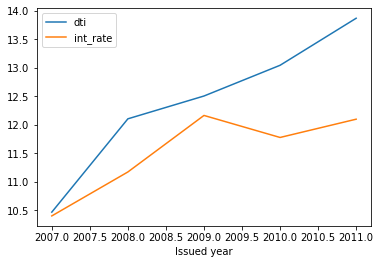

In [157]:
loan_by_loanamnt_years = loan.groupby('issue_d_year').mean()[['dti','int_rate']]
loan_by_loanamnt_years.plot.line()
plt.xlabel('Issued year')
plt.show()

**Inference:**

- Over the years, the average DTI ratio of the applicants has increased, which means, more risky applicants are applying for loans.
- Also, the interest rate is in upward trend, which means, borrowers are ready to take loans at higher interest rates.

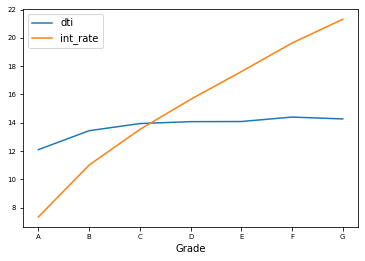

In [158]:
loan_by_loanamnt_grade = loan.groupby('grade').mean()[['dti','int_rate']]
loan_by_loanamnt_grade.plot.line(fontsize=7)
plt.xlabel('Grade')
plt.show()

**Inference:**

- As the grade of the borrowers increases, the interest rate for the loans had also increased. Riskier borrowers are given loans at higher interest rates.
- However, DTI ratio of the borrowers is pretty much flat across the grades.

In [159]:
cont_var= ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc',
           'dti','pub_rec','revol_util','pub_rec_bankruptcies','issue_d_year','earliest_cr_line_year']
loan_corr = loan[loan.loan_status == 'Charged Off']
loan_corr = loan_corr[cont_var].corr()
loan_corr.dropna(axis = 1, how = 'all', inplace = True)
loan_corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec,revol_util,pub_rec_bankruptcies,issue_d_year,earliest_cr_line_year
loan_amnt,1.000000,0.978485,0.903476,0.345809,0.923934,0.341008,0.067813,-0.040618,0.045357,-0.017046,0.122907,-0.181745
funded_amnt,0.978485,1.000000,0.923777,0.349408,0.952706,0.336839,0.065519,-0.046728,0.048672,-0.023882,0.135206,-0.171063
funded_amnt_inv,0.903476,0.923777,1.000000,0.368875,0.851256,0.301568,0.079134,-0.049841,0.066122,-0.022589,0.327013,-0.134884
int_rate,0.345809,0.349408,0.368875,1.000000,0.321567,0.130249,0.049523,0.082961,0.378516,0.082086,0.190168,0.079552
installment,0.923934,0.952706,0.851256,0.321567,1.000000,0.348218,0.046364,-0.036392,0.076347,-0.020152,0.029292,-0.151742
annual_inc,0.341008,0.336839,0.301568,0.130249,0.348218,1.000000,-0.083890,-0.000043,0.075499,0.005471,-0.020535,-0.196460
dti,0.067813,0.065519,0.079134,0.049523,0.046364,-0.083890,1.000000,0.002655,0.228676,0.016763,0.095116,-0.063429
pub_rec,-0.040618,-0.046728,-0.049841,0.082961,-0.036392,-0.000043,0.002655,1.000000,0.060628,0.847190,-0.026051,-0.059097
revol_util,0.045357,0.048672,0.066122,0.378516,0.076347,0.075499,0.228676,0.060628,1.000000,0.067555,0.076414,-0.025723
pub_rec_bankruptcies,-0.017046,-0.023882,-0.022589,0.082086,-0.020152,0.005471,0.016763,0.847190,0.067555,1.000000,0.006087,-0.065692


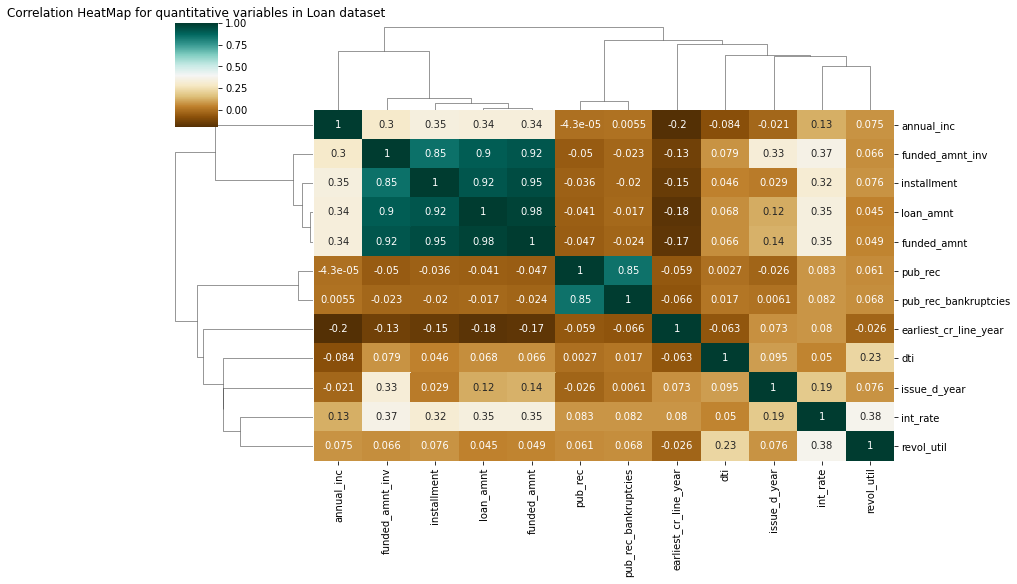

In [160]:
sns.clustermap(loan_corr,annot=True,figsize=(12, 8),cmap="BrBG")
plt.title('Correlation HeatMap for quantitative variables in Loan dataset')
plt.show()

**Inferences:**
1. Loan Amount, Funded Amount, Funded Amount from Investor and Installment are highly correlated and forms a postive correlation grid.
2. Funded Amount is postively correlated with Annual Income.
3. Pub_rec and Pub_rec_bankruptices are strongly correlated with each other.
4. Pub_rec and Pub_rec_bankruptices are negatively correlated with funded amount which is a good sign.

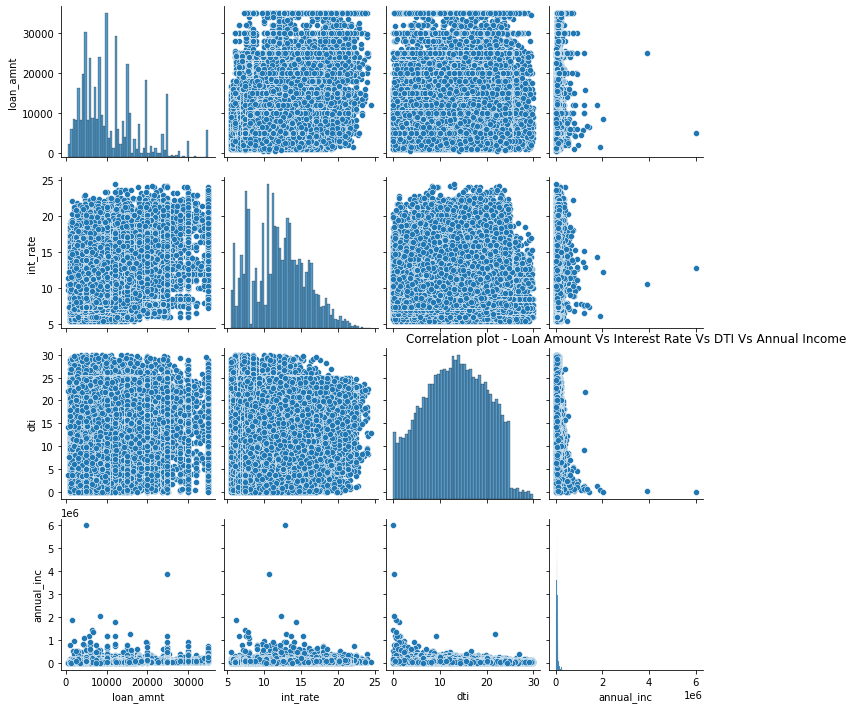

In [161]:
sns.pairplot(loan[["loan_amnt", "int_rate","dti", "annual_inc"]])
plt.title('Correlation plot - Loan Amount Vs Interest Rate Vs DTI Vs Annual Income')
plt.show()

**Inferences:**
1. Borrowers with higher annual income had got higher loan amounts.
2. With the increasing loan amounts, interest rates had also increased.
3. Borrowers with higher DTI were given loans at higher interest rate.

### Summary:

**The driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default are:**

1. Term
2. Interest Rate
3. DTI ratio
4. Purpose
5. Loan Amount
6. Annual Income
7. Grade
8. Sub Grade
9. Installment Amount
10. Home Ownership
11. Employment Length
12. Address State

**- Borrowers choosing 60month term are more likely to Charge Off at 25%.**

**- Higher the interest rate of the loan, higher are the chances for the loan to get Charged Off.**

**- Higher the DTI ratio of the borrower, more likely that it will be defaulted.**

**- Majority of the loan applications had the purpose mentioned as debt consolidation, and the small business loan applications default the most.**

**- Higher is the loan amounts requested, higher had been the Charged Off rate.**

**- People with lower annual income had defaulted the most.**

**- Borrowers with higher grades defaulted the most.**

**- For a given grade category, borrowers with higher sub grades defaulted the most.**

**- Borrowers with Rented and Mortgaged homes mostly went for the loans, but the ones with ‘Others’ had higher Charged Off rate.**

**- Higher is the installment amount to be paid, higher is the Charged Off rate.**

**- Borrowers with 10+ years of employment length had requested for more number of loans and they are ones who defaulted the most.**

**- Most of the borrowers are from CA, NY and FL.**


### Recommendations:

Lending Club can follow the below recommendations to bring down Charged Off loans:

**> Prefer applications with 36moths term and who wants to loan at lower interest rates.**

**> Borrowers with higher grade/sub-grade, low DTI ratio, higher annual income and who has a own house has to be preferred.**

**> Avoiding higher loan amounts with higher installments to be paid is suggested.**

**> Have to be cautious approving loans for small businesses.**

**> Borrowers from NV, AK and TN has to be thoroughly scrutinized.**
